# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: xx  (TODO)

Group Members:
- Name (NIM)
- Name (NIM)
- ...

## Import Libraries

In [304]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from csv_reader import CSVReader
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from csv_reader import CSVReader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold


## Import Dataset

In [305]:
LOCAL_BASE_PATH = "../data/"
LOCAL_PATH = {
    # Training data paths
    "TRAIN_ADDITIONAL_FEATURES": LOCAL_BASE_PATH + "train/additional_features_train.csv",
    "TRAIN_BASIC_FEATURES": LOCAL_BASE_PATH + "train/basic_features_train.csv",
    "TRAIN_CONTENT_FEATURES": LOCAL_BASE_PATH + "train/content_features_train.csv",
    "TRAIN_FLOW_FEATURES": LOCAL_BASE_PATH + "train/flow_features_train.csv",
    "TRAIN_LABELS": LOCAL_BASE_PATH + "train/labels_train.csv",
    "TRAIN_TIME_FEATURES": LOCAL_BASE_PATH + "train/time_features_train.csv",
    "TRAIN_METADATA": LOCAL_BASE_PATH + "train/UNSW-NB15_features-modified.csv",

    # Test data paths 
    "TEST_ADDITIONAL_FEATURES": LOCAL_BASE_PATH + "test/additional_features_test.csv",
    "TEST_BASIC_FEATURES": LOCAL_BASE_PATH + "test/basic_features_test.csv",
    "TEST_CONTENT_FEATURES": LOCAL_BASE_PATH + "test/content_features_test.csv",
    "TEST_FLOW_FEATURES": LOCAL_BASE_PATH + "test/flow_features_test.csv",
    "TEST_TIME_FEATURES": LOCAL_BASE_PATH + "test/time_features_test.csv",

    # Submission path
    "SUBMISSION_PATH": LOCAL_BASE_PATH + "submissions/submission.csv"
}

In [306]:
# from data import LOCAL_PATH
reader = CSVReader(LOCAL_PATH)

keys = reader.get_available_keys()
data = {
    key: reader.get_data(key) for key in keys if key != "TRAIN_METADATA" and key.startswith("TRAIN")
}

df = data["TRAIN_BASIC_FEATURES"]
for key, datas in data.items():
    if key != 'TRAIN_BASIC_FEATURES':
        df = pd.merge(df, datas, on='id', how='inner')
df.drop(columns=["label"], inplace=True)



modified_features_df = reader.get_data("TRAIN_METADATA")
modified_features_df.drop(modified_features_df[modified_features_df['Name'] == 'label'].index, inplace=True)


Successfully loaded TRAIN_LABELS
Successfully loaded TRAIN_FLOW_FEATURES
Successfully loaded TRAIN_METADATA
Successfully loaded TEST_ADDITIONAL_FEATURES
Successfully loaded TEST_BASIC_FEATURES
Successfully loaded TRAIN_CONTENT_FEATURES
Successfully loaded TEST_FLOW_FEATURES
Error loading SUBMISSION_PATH: [Errno 2] No such file or directory: '../data/submissions/submission.csv'
Successfully loaded TEST_CONTENT_FEATURES
Successfully loaded SUBMISSION_PATH
Successfully loaded TEST_TIME_FEATURES
Successfully loaded TRAIN_TIME_FEATURES
Successfully loaded TRAIN_ADDITIONAL_FEATURES
Successfully loaded TRAIN_BASIC_FEATURES


In [307]:
test = { 
    key: reader.get_data(key) for key in keys if key.startswith("TEST")
}

test_df = test["TEST_BASIC_FEATURES"]
for key, datas in test.items():
    if key != 'TEST_BASIC_FEATURES':
        test_df = pd.merge(test_df, datas, on='id', how='inner')

      

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [308]:
display(modified_features_df)


,No.,Name,Type,Description,feature_type
0,5,proto,nominal,Transaction protocol,flow
1,6,state,nominal,Indicates to the state and its dependent proto...,basic
2,7,dur,Float,Record total duration,basic
3,8,sbytes,Integer,Source to destination transaction bytes,basic
4,9,dbytes,Integer,Destination to source transaction bytes,basic
5,10,sttl,Integer,Source to destination time to live value,basic
6,11,dttl,Integer,Destination to source time to live value,basic
7,12,sloss,Integer,Source packets retransmitted or dropped,basic
8,13,dloss,Integer,Destination packets retransmitted or dropped,basic
9,14,service,nominal,"http, ftp, smtp, ssh, dns, ftp-data ,irc and ...",basic


In [309]:
df.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,dmean,trans_depth,response_body_len,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
count,166619.000000,1.667800e+05,1.664720e+05,166516.000000,166687.000000,166547.000000,166363.000000,1.665550e+05,1.665040e+05,166687.000000,...,166486.000000,166556.000000,1.665500e+05,1.666030e+05,166495.000000,166634.000000,166607.000000,166505.000000,166605.000000,166746.000000
mean,1.359299,8.734079e+03,1.493589e+04,179.521944,79.584179,4.904790,6.971688,7.342186e+07,6.718596e+05,20.266134,...,124.161041,0.106193,2.157133e+03,4.993982e+03,604.891720,987.360974,87.763617,0.041331,0.021042,0.020402
std,6.485386,1.712289e+05,1.430150e+05,102.957427,110.494848,64.867849,51.801936,1.884564e+08,2.422879e+06,136.433895,...,258.265755,0.794070,5.509898e+04,4.506783e+04,4082.439167,7246.462797,987.040024,0.079428,0.043560,0.040619
min,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.303032e+04,0.000000e+00,2.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000
50%,0.001548,4.500000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.714544e+05,1.426630e+03,2.000000,...,44.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.284723,0.006000,0.000000,0.000000,0.000000
75%,0.667311,1.418000e+03,1.096000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.807410e+04,12.000000,...,89.000000,0.000000,0.000000e+00,2.511184e+03,114.753348,55.205806,50.933127,0.065151,0.023235,0.038951
max,59.999989,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,...,1458.000000,172.000000,6.558056e+06,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884


In [310]:
df.isnull().sum()

state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
id                      0
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport_ltm     8775
ct_dst_sport_ltm     8788
ct_dst_src_ltm       8895
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
proto                8826
attack_cat              0
sjit                 8738
djit                 8846
sinpkt      

In [311]:
binary_columns = ['is_sm_ips_ports', 'is_ftp_login']


# first we check how many values in the supposed to be binary columns
for col in binary_columns:
    print(f"\n{col} unique values: {df[col].unique()}")
    print(f"{col} value counts: {df[col].value_counts()}")



is_sm_ips_ports unique values: [ 0. nan  1.]
is_sm_ips_ports value counts: is_sm_ips_ports
0.0    163963
1.0      2632
Name: count, dtype: int64

is_ftp_login unique values: [ 0. nan  1.  2.  4.]
is_ftp_login value counts: is_ftp_login
0.0    164251
1.0      2422
4.0        16
2.0         5
Name: count, dtype: int64


In [312]:
# 3. The number of unique values for each categorical features.

# Assume: We really sure the metadata is correct.
# So the categorical is when the type is other than Integer and Float
features = modified_features_df['Name']

categorical_features = modified_features_df[~modified_features_df['Type '].str.contains('integer|float', case=False, na=False)]['Name']

numerical_features = features[~features.isin(categorical_features)]


unique_values = df[categorical_features].nunique().sort_values(ascending=False)
unique_values

proto              133
service             13
attack_cat          10
state                9
is_ftp_login         4
is_sm_ips_ports      2
dtype: int64

In [313]:
print("Numerical Features:")
display(numerical_features)

# Calculate statistical measures for numerical features
statistics = df[numerical_features].agg(['min', 'max', 'mean', 'median', 'std']).transpose()

# Rename columns for clarity
statistics = statistics.rename(columns={
    'min': 'Minimum',
    'max': 'Maximum',
    'mean': 'Mean',
    'median': 'Median',
    'std': 'Standard Deviation'
})

print("Statistical Measures for Numerical Features:")
display(statistics)


Numerical Features:


2                   dur
3                sbytes
4                dbytes
5                  sttl
6                  dttl
7                 sloss
8                 dloss
10                sload
11                dload
12                spkts
13                dpkts
14                 swin
15                 dwin
16                stcpb
17                dtcpb
18                smean
19                dmean
20          trans_depth
21    response_body_len
22                 sjit
23                 djit
24               sinpkt
25               dinpkt
26               tcprtt
27               synack
28               ackdat
30         ct_state_ttl
31     ct_flw_http_mthd
33           ct_ftp_cmd
34           ct_srv_src
35           ct_srv_dst
36           ct_dst_ltm
37           ct_src_ltm
38     ct_src_dport_ltm
39     ct_dst_sport_ltm
40       ct_dst_src_ltm
Name: Name, dtype: object

Statistical Measures for Numerical Features:


,Minimum,Maximum,Mean,Median,Standard Deviation
dur,0.0,5.999999e+01,1.359299e+00,0.001548,6.485386e+00
sbytes,28.0,1.296523e+07,8.734079e+03,450.000000,1.712289e+05
dbytes,0.0,1.465555e+07,1.493589e+04,164.000000,1.430150e+05
sttl,0.0,2.550000e+02,1.795219e+02,254.000000,1.029574e+02
dttl,0.0,2.540000e+02,7.958418e+01,29.000000,1.104948e+02
sloss,0.0,4.803000e+03,4.904790e+00,0.000000,6.486785e+01
dloss,0.0,5.484000e+03,6.971688e+00,0.000000,5.180194e+01
sload,0.0,5.988000e+09,7.342186e+07,871454.437500,1.884564e+08
dload,0.0,2.242273e+07,6.718596e+05,1426.629700,2.422879e+06
spkts,1.0,9.616000e+03,2.026613e+01,2.000000,1.364339e+02


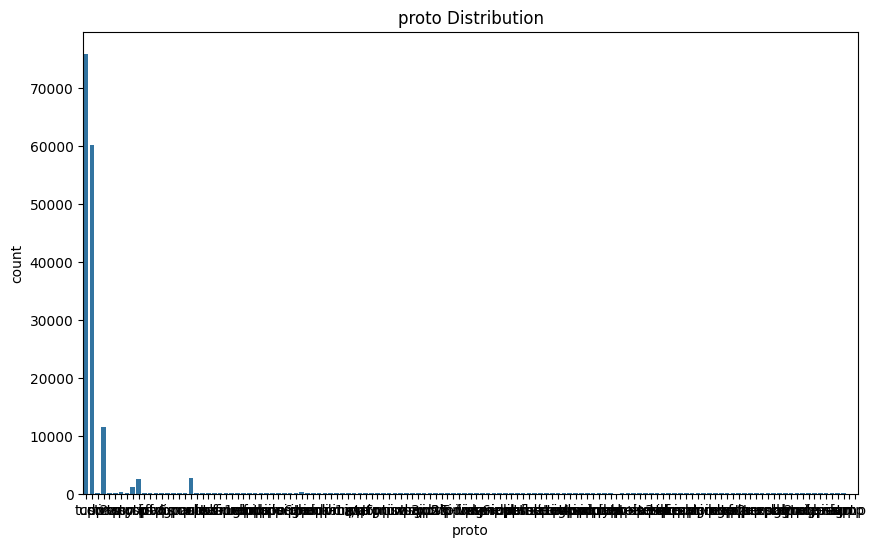

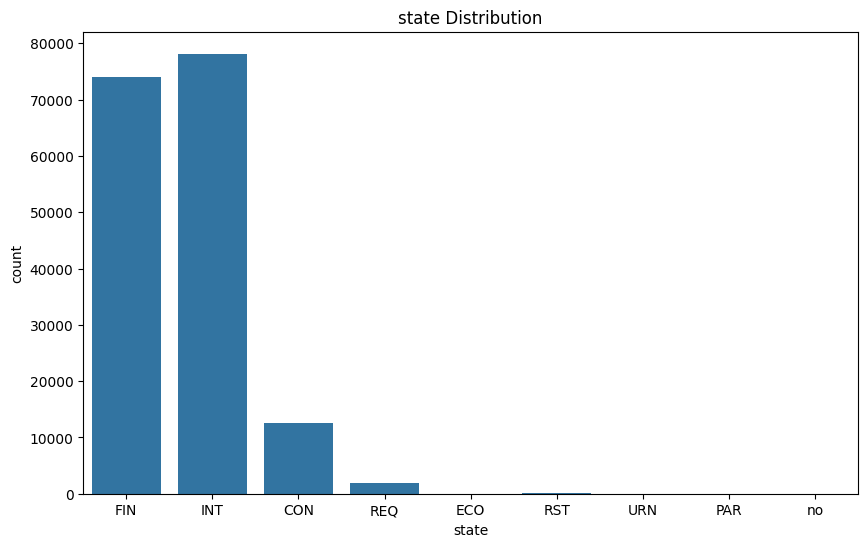

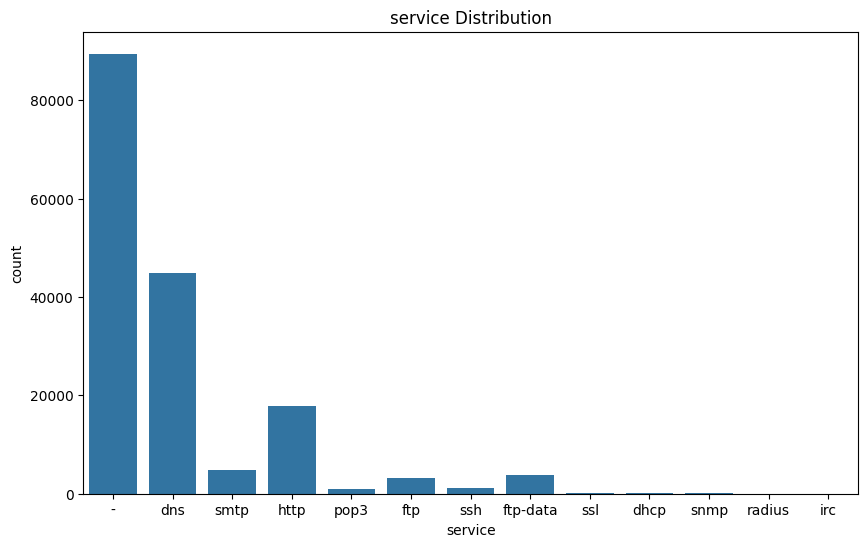

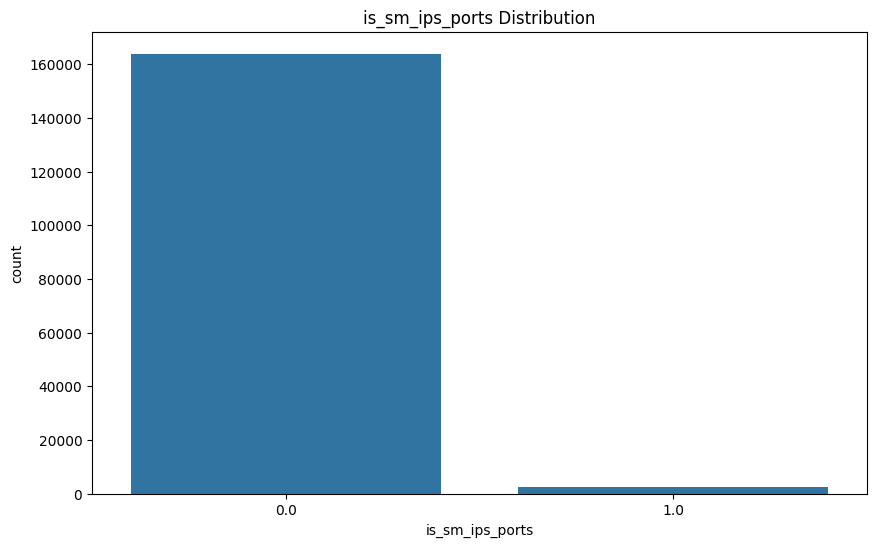

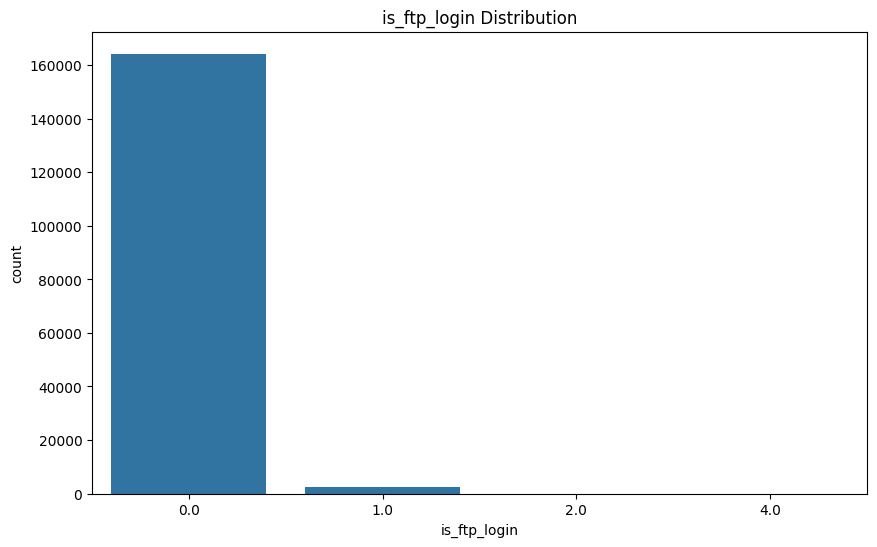

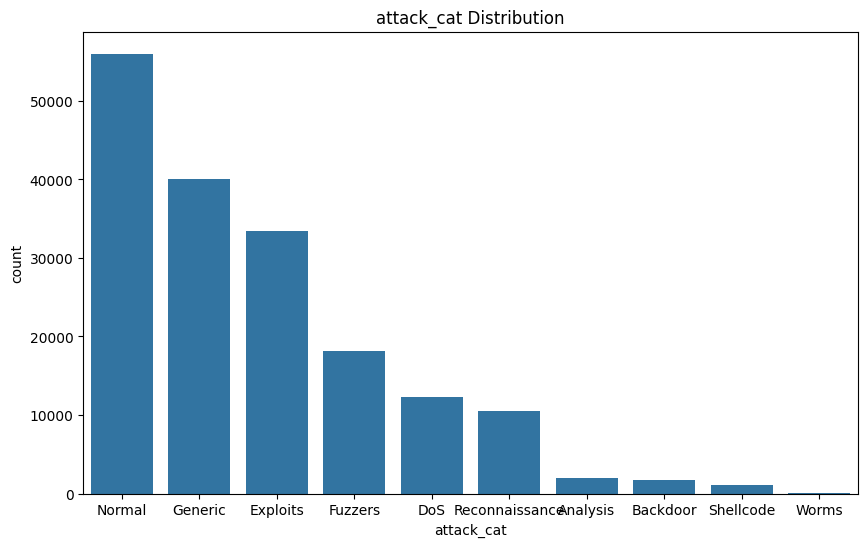

In [314]:
# graph for categorical

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.show()

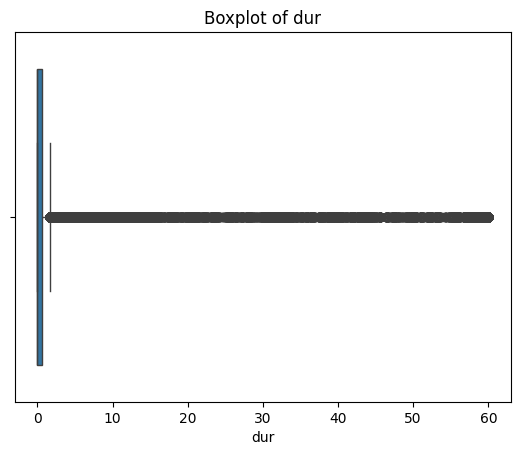

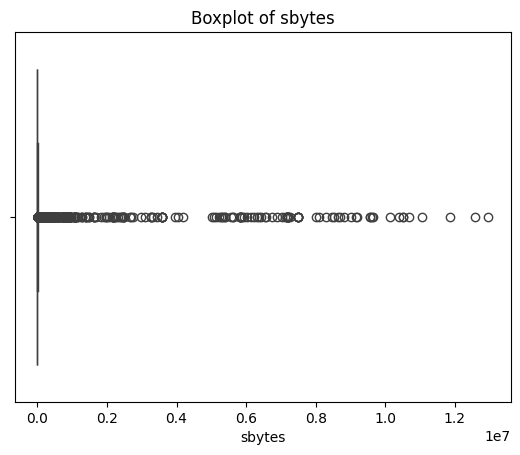

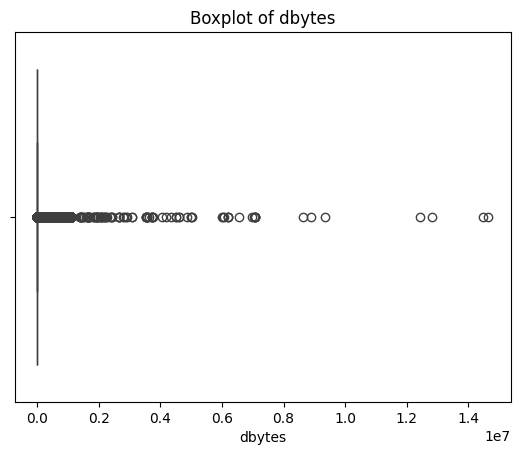

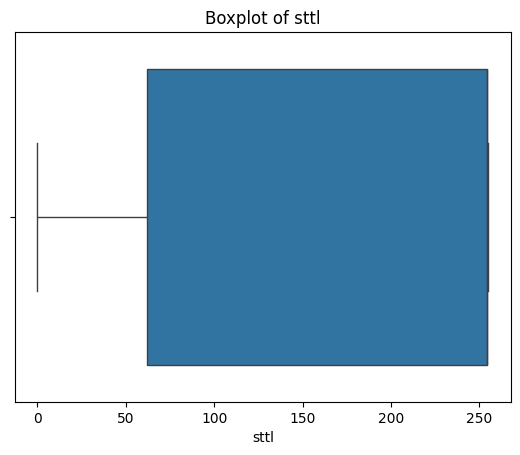

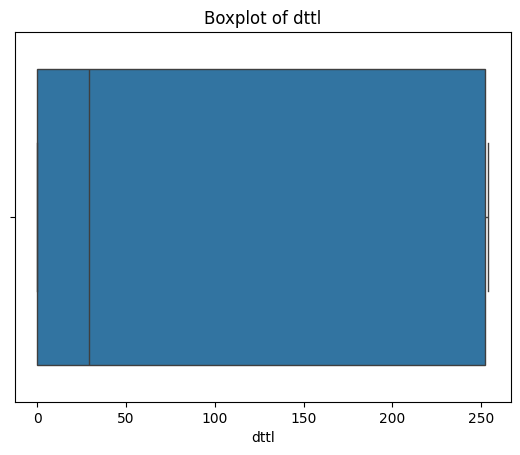

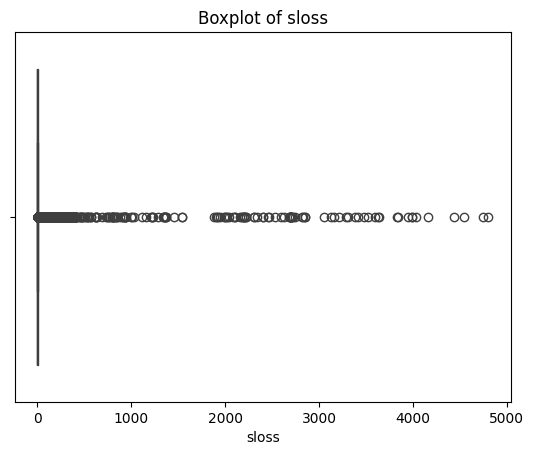

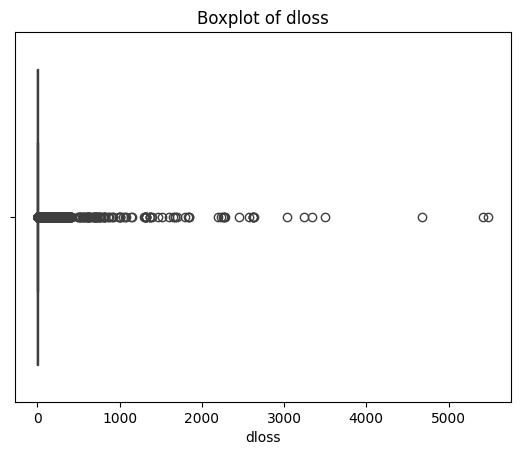

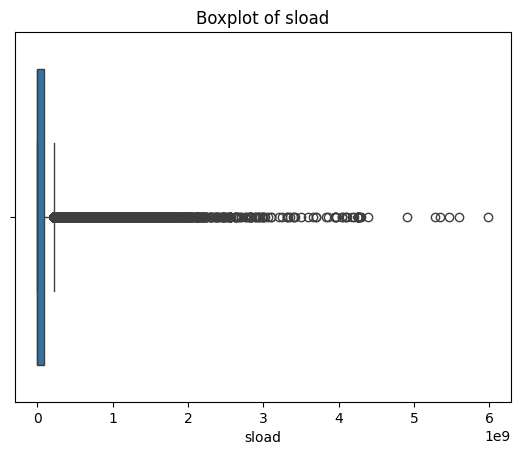

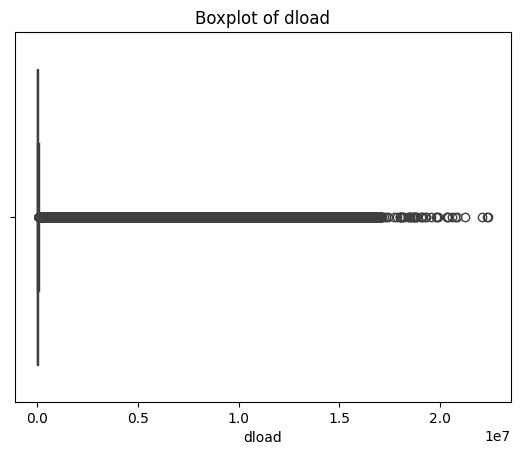

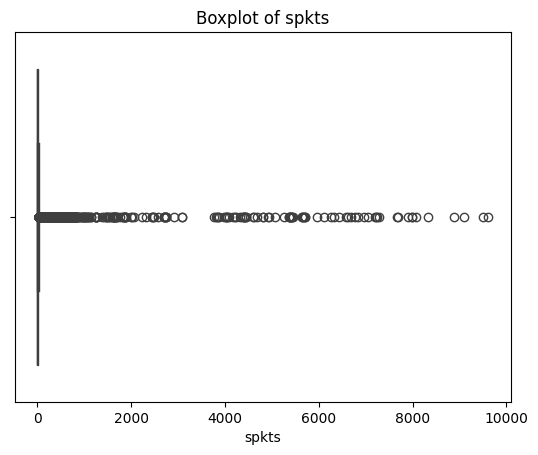

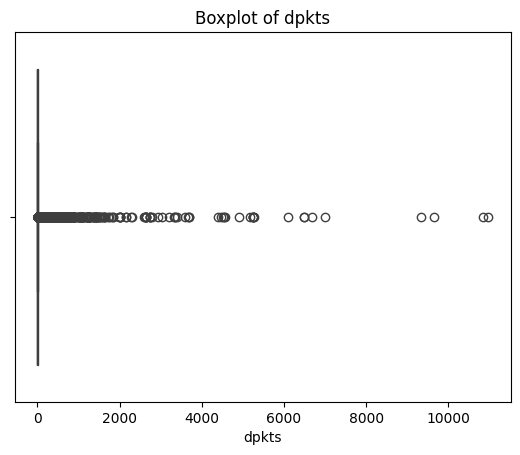

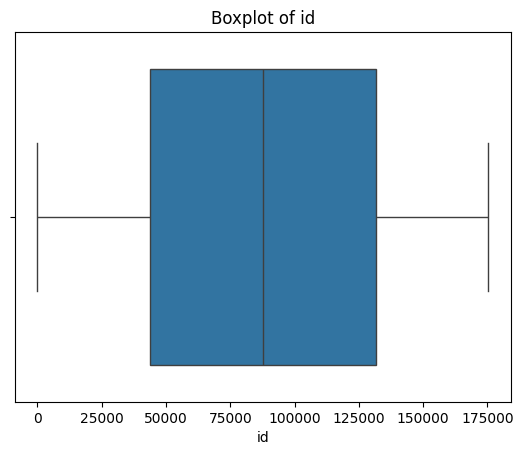

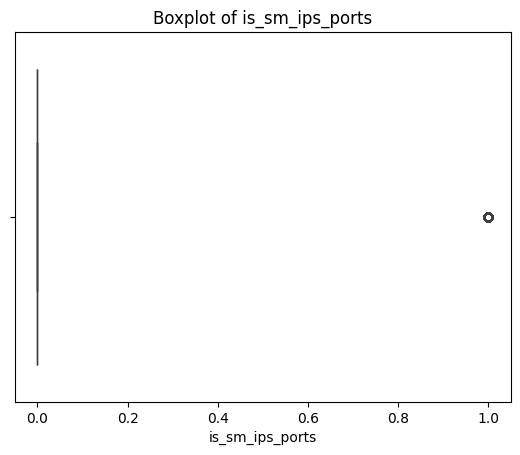

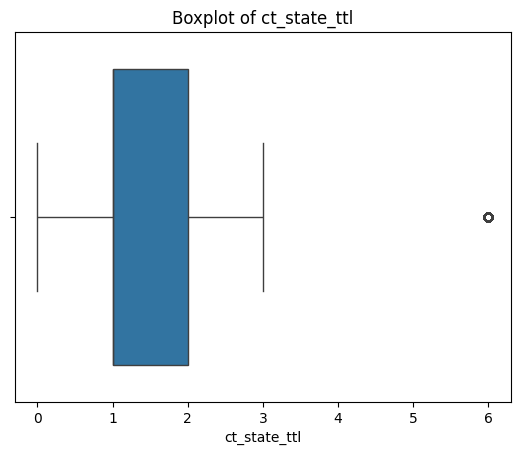

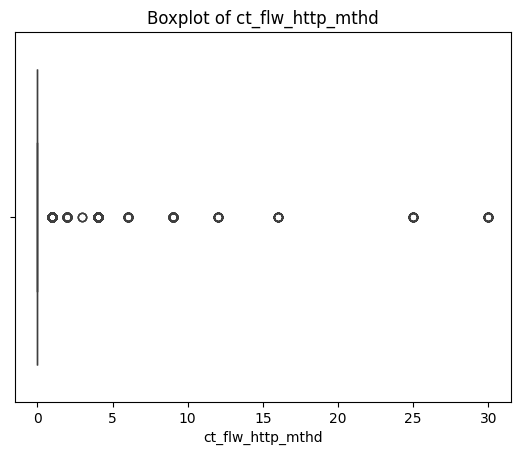

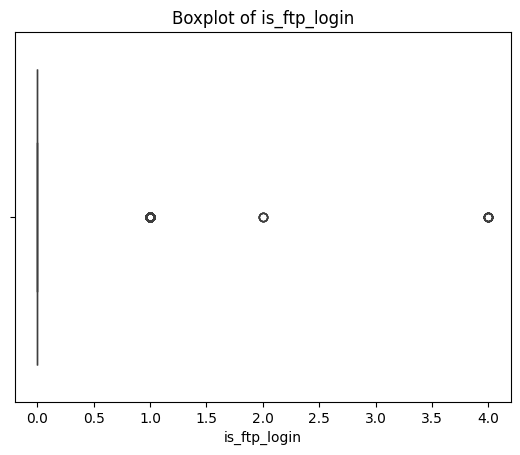

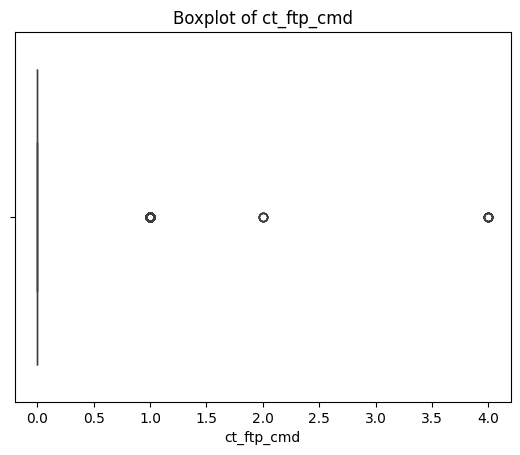

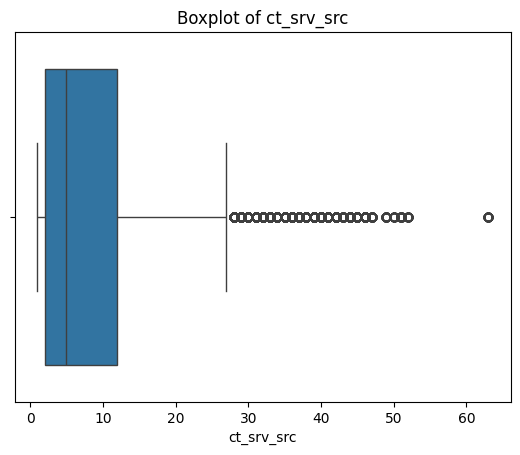

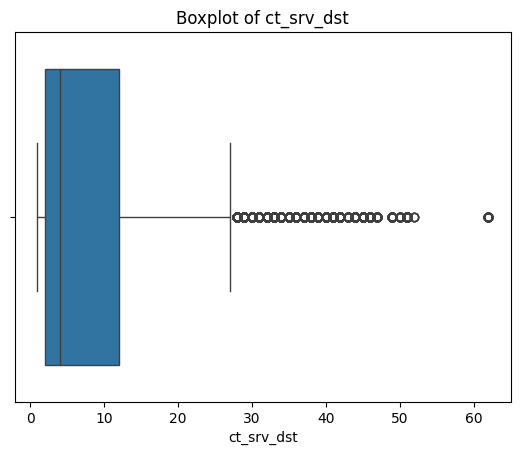

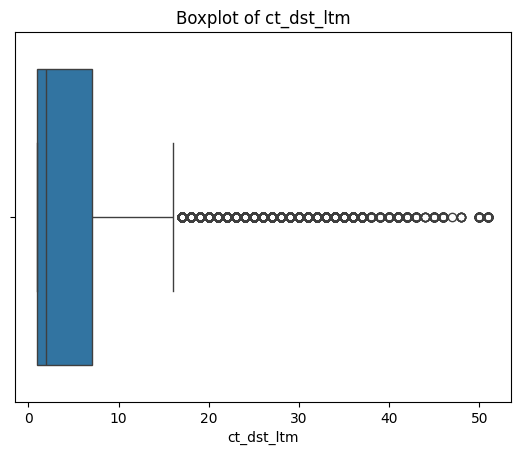

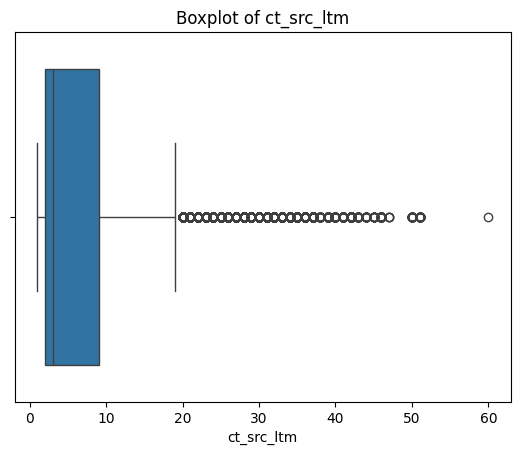

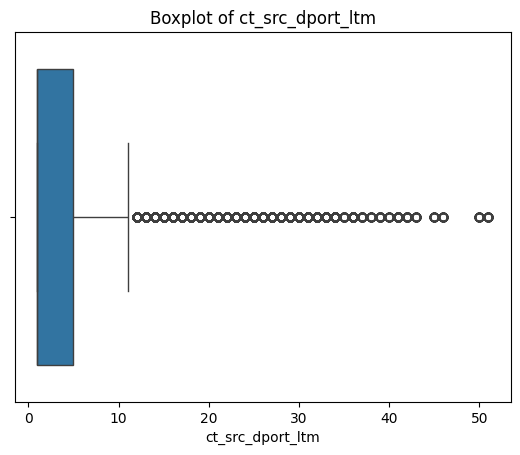

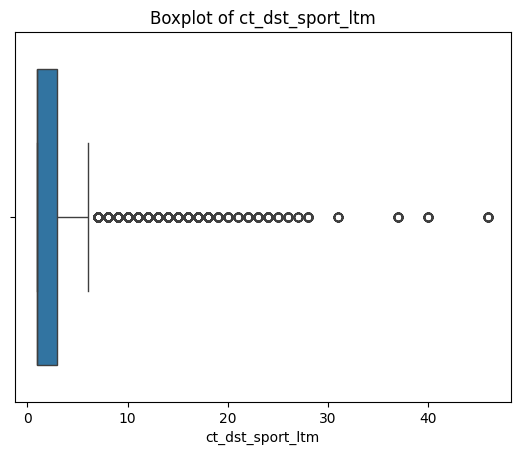

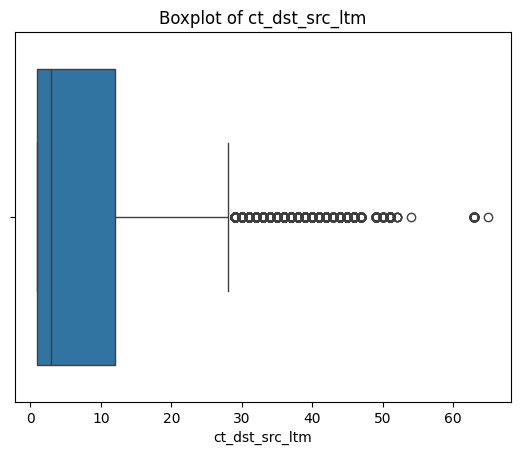

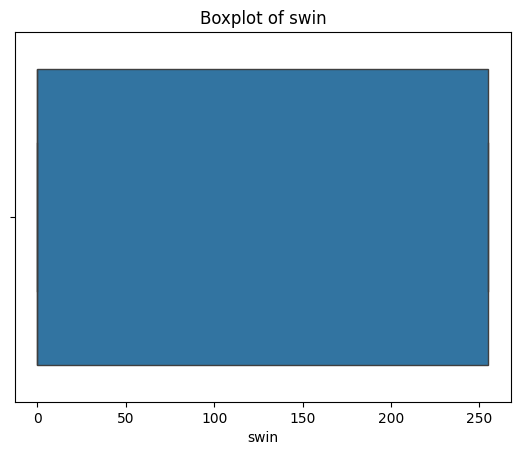

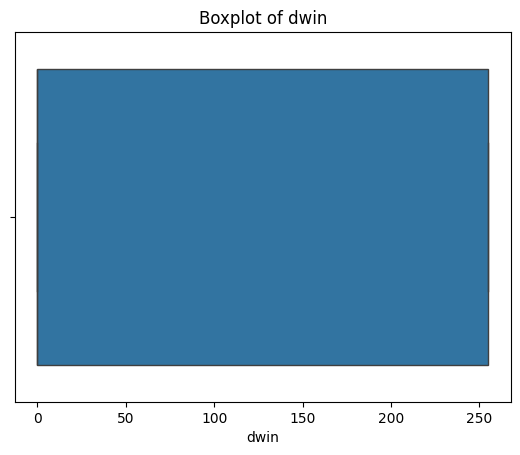

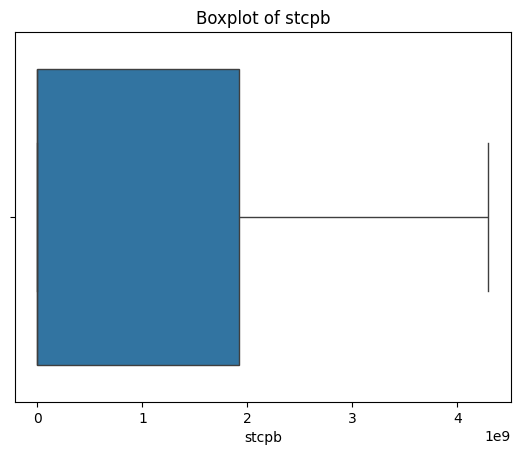

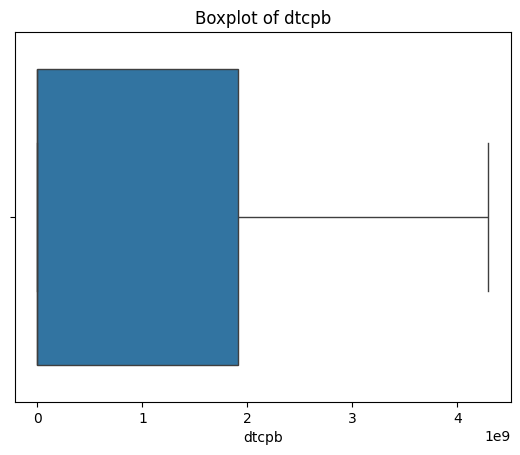

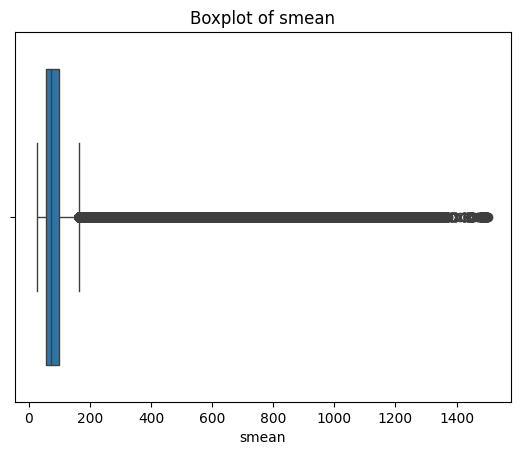

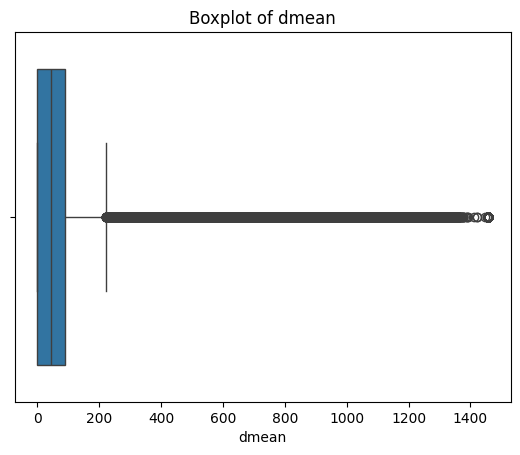

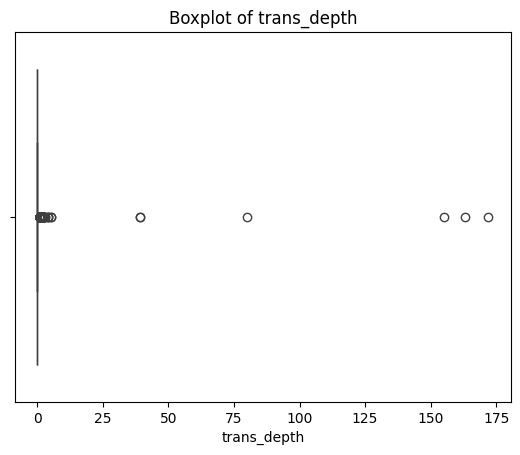

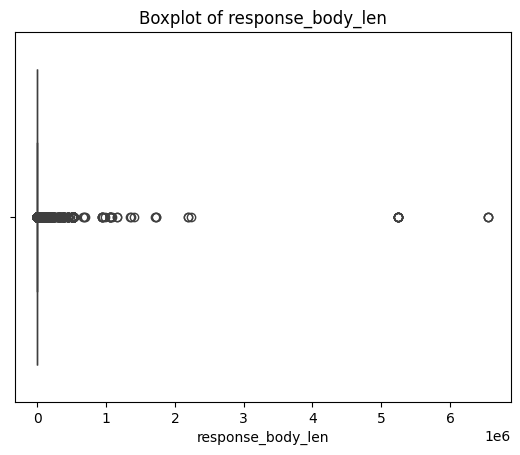

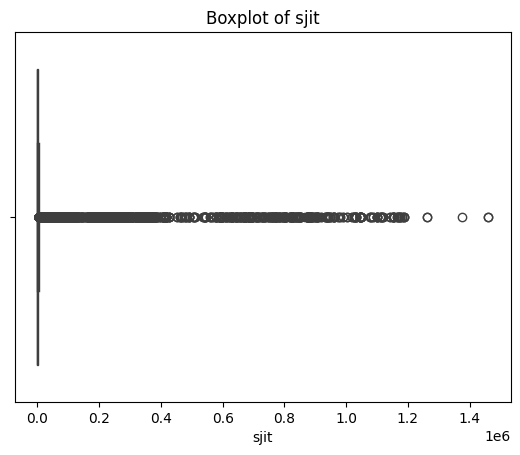

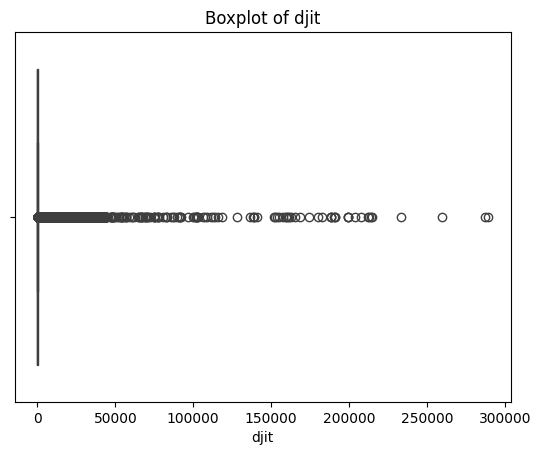

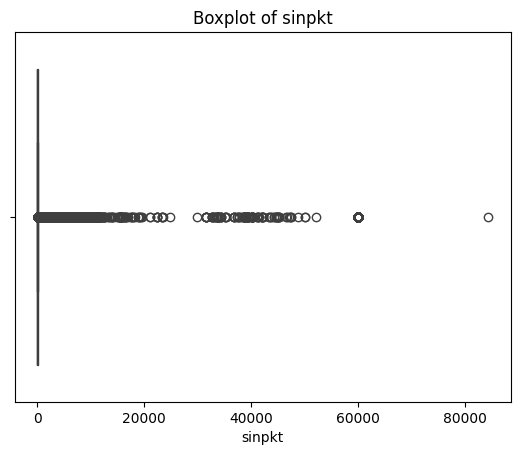

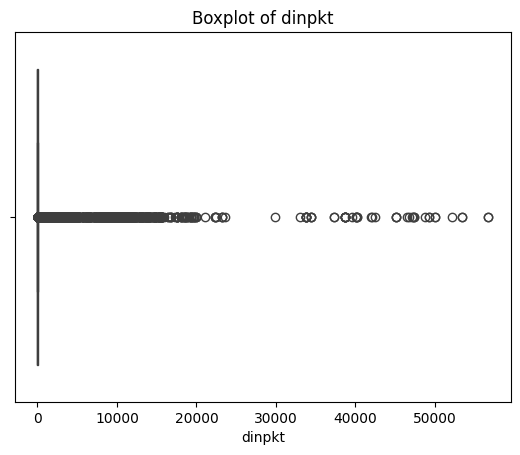

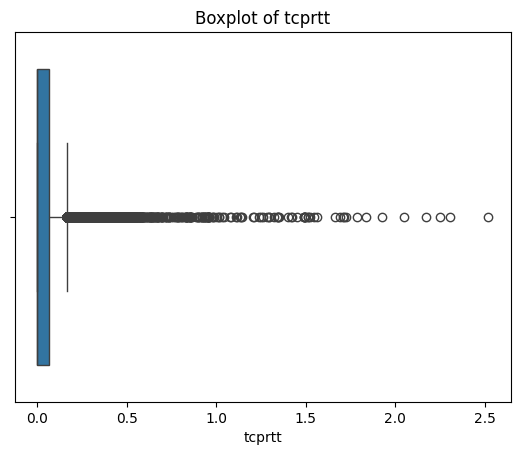

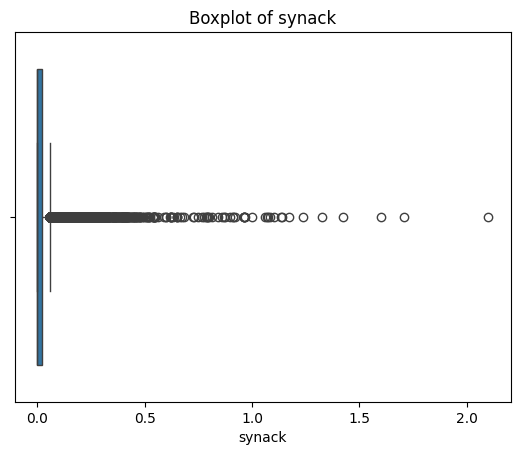

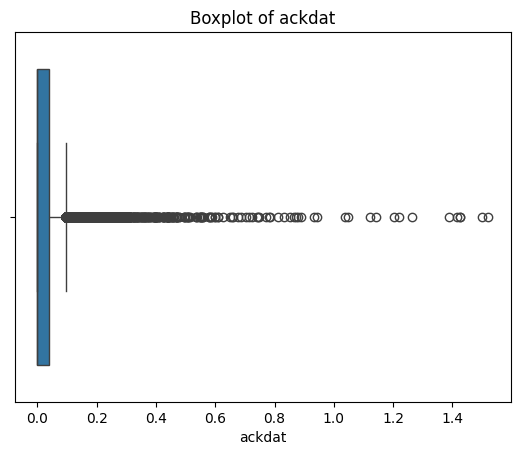

In [315]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [316]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
train_set, val_set = train_test_split(df, test_size=0.2, random_state=42)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

In [317]:
class BinaryColumnCleaner(BaseEstimator, TransformerMixin):
    """
    A transformer for cleaning binary columns by ensuring values are only 0, 1, or NaN.
    
    Parameters:
    -----------
    binary_columns : list
        List of column names that should contain only binary values
    verbose : bool, default=True
        If True, prints the value distributions before and after cleaning
        
    Attributes:
    -----------
    binary_modes_ : dict
        Dictionary storing the mode values for each binary column
    """
    
    def __init__(self, binary_columns, verbose=True):
        self.binary_columns = binary_columns
        self.verbose = verbose
        self.binary_modes_ = {}
    
    def fit(self, X, y=None):
        """
        Fit the transformer by calculating mode values for each binary column.
        
        Parameters:
        -----------
        X : pandas DataFrame
            Input data
        y : Ignored
            Not used, present here for API consistency
            
        Returns:
        --------
        self : object
            Returns self
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
            
        # Check if binary columns exist in the dataframe
        missing_cols = [col for col in self.binary_columns if col not in X.columns]
        if missing_cols:
            raise ValueError(f"Columns {missing_cols} not found in the input DataFrame")
        
        # Calculate mode for each binary column
        for col in self.binary_columns:
            # Get mode of valid binary values (0 or 1)
            valid_binary_values = X[col][X[col].isin([0, 1])]
            if len(valid_binary_values) > 0:
                self.binary_modes_[col] = valid_binary_values.mode()[0]
            else:
                raise ValueError(f"No valid binary values (0 or 1) found in column {col}")
        
        return self
    
    def transform(self, X):
        """
        Transform the data by cleaning binary columns.
        
        Parameters:
        -----------
        X : pandas DataFrame
            Input data to be transformed
            
        Returns:
        --------
        pandas DataFrame
            Transformed data with cleaned binary columns
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # Create a copy of the input
        X_cleaned = X.copy()
        
        for col in self.binary_columns:
            if self.verbose:
                print(f"\nCleaning {col}:")
                print("Original value distribution:")
                print(X_cleaned[col].value_counts(dropna=False))
            
            # Create mask for invalid values (not 0, 1, or NaN)
            mask = (~X_cleaned[col].isin([0, 1])) & (~X_cleaned[col].isna())
            
            # Replace invalid values with the mode
            X_cleaned.loc[mask, col] = self.binary_modes_[col]
            
            if self.verbose:
                print("\nNew value distribution:")
                print(X_cleaned[col].value_counts(dropna=False))
        
        return X_cleaned
    
    def get_feature_names_out(self, input_features=None):
        """
        Get output feature names for transformation.
        
        Parameters:
        -----------
        input_features : list of str or None, default=None
            Not used, present here for API consistency
            
        Returns:
        --------
        list
            List of feature names
        """
        return self.binary_columns


binary_cleaner = BinaryColumnCleaner(
    binary_columns=['is_sm_ips_ports', 'is_ftp_login'],
    verbose=True
)

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [318]:
class NetworkTrafficImputer(BaseEstimator, TransformerMixin):
    """
    A transformer for imputing missing values in network traffic data.
    
    Parameters:
    -----------
    numerical_strategy : str, default='median'
        Strategy for numerical imputation
    categorical_strategy : str, default='most_frequent'
        Strategy for categorical imputation
    verbose : bool, default=True
        If True, prints imputation progress and summary
    """
    
    def __init__(self, numerical_strategy='median', categorical_strategy='most_frequent', verbose=True):
        self.numerical_strategy = numerical_strategy
        self.categorical_strategy = categorical_strategy
        self.verbose = verbose
        
        # Initialize imputers
        self.numerical_imputer = SimpleImputer(strategy=numerical_strategy)
        self.categorical_imputer = SimpleImputer(strategy=categorical_strategy)
        self.binary_imputer = SimpleImputer(strategy='most_frequent')
        
        # Feature groups
        self.numerical_features = [
            # Flow-based features
            'sbytes', 'dbytes', 'spkts', 'dpkts', 'sload', 'dload', 'sloss', 'dloss',
            # Time-based features
            'dur', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat',
            # TCP features
            'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth',
            # Count features
            'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 
            'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 
            'ct_dst_sport_ltm', 'ct_dst_src_ltm',
            # Additional numerical features
            'sttl', 'dttl', 'response_body_len'
        ]
        self.categorical_features = ['proto', 'service', 'state']
        self.binary_features = ['is_sm_ips_ports', 'is_ftp_login']
        
    def fit(self, X, y=None):
        """
        Fit the imputers on the input data.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # Store original dtypes
        self.original_dtypes_ = X.dtypes
        
        # Get existing features
        self.existing_num_features_ = [col for col in self.numerical_features if col in X.columns]
        self.existing_cat_features_ = [col for col in self.categorical_features if col in X.columns]
        self.existing_bin_features_ = [col for col in self.binary_features if col in X.columns]
        
        # Fit imputers
        if self.existing_num_features_:
            self.numerical_imputer.fit(X[self.existing_num_features_])
        if self.existing_cat_features_:
            self.categorical_imputer.fit(X[self.existing_cat_features_])
        if self.existing_bin_features_:
            self.binary_imputer.fit(X[self.existing_bin_features_])
            
        return self
    
    def transform(self, X):
        """
        Transform the data by imputing missing values.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
            
        X_imputed = X.copy()
        
        # 1. Handle numerical features
        if self.verbose:
            print("Imputing numerical features...")
        if self.existing_num_features_:
            X_imputed[self.existing_num_features_] = self.numerical_imputer.transform(
                X_imputed[self.existing_num_features_]
            )
        
        # 2. Handle categorical features
        if self.verbose:
            print("Imputing categorical features...")
        if self.existing_cat_features_:
            X_imputed[self.existing_cat_features_] = self.categorical_imputer.transform(
                X_imputed[self.existing_cat_features_]
            )
        
        # 3. Handle binary features
        if self.verbose:
            print("Imputing binary features...")
        if self.existing_bin_features_:
            X_imputed[self.existing_bin_features_] = self.binary_imputer.transform(
                X_imputed[self.existing_bin_features_]
            )
            # Ensure binary columns are 0 or 1
            for col in self.existing_bin_features_:
                X_imputed[col] = X_imputed[col].astype(int)
                mask = ~X_imputed[col].isin([0, 1])
                if mask.any():
                    mode_val = X_imputed[col].mode()[0]
                    X_imputed.loc[mask, col] = mode_val
        
        # Restore original dtypes
        for col in X_imputed.columns:
            if col in self.original_dtypes_:
                X_imputed[col] = X_imputed[col].astype(self.original_dtypes_[col])
        
        # Print summary if verbose
        if self.verbose:
            missing_after = X_imputed.isnull().sum()
            print("\nImputation Summary:")
            print("-" * 50)
            if missing_after.sum() > 0:
                print("\nWarning: Some columns still have missing values:")
                print(missing_after[missing_after > 0])
            else:
                print("All missing values have been successfully imputed!")
            
            print("\nBinary Columns Check:")
            for col in self.existing_bin_features_:
                unique_vals = sorted(X_imputed[col].unique())
                print(f"{col} unique values after imputation: {unique_vals}")
        
        return X_imputed
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformation."""
        return input_features if input_features is not None else self.existing_num_features_ + self.existing_cat_features_ + self.existing_bin_features_

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [319]:
class NetworkTrafficOutlierHandler(BaseEstimator, TransformerMixin):
    """
    A transformer for handling outliers in network traffic data.
    
    Parameters:
    -----------
    method : str, default='clip'
        Method to handle outliers: 'clip', 'remove', 'winsorize', or 'transform'
    contamination : float, default=1.5
        IQR multiplier for outlier detection
    exclude_columns : list or None, default=None
        Columns to exclude from outlier handling
    verbose : bool, default=True
        If True, prints summary statistics and plots
    """
    
    def __init__(self, method='clip', contamination=1.5, exclude_columns=None, verbose=True):
        self.method = method
        self.contamination = contamination
        self.exclude_columns = exclude_columns
        self.verbose = verbose
        self.boundaries_ = {}
        
        if self.exclude_columns is None:
            self.exclude_columns = [
                'is_sm_ips_ports', 'is_ftp_login',  # binary columns
                'proto', 'service', 'state', 'attack_cat'  # categorical columns
            ]
    
    def _detect_outliers(self, X, numerical_columns):
        """Calculate outlier boundaries using IQR method."""
        boundaries = {}
        outlier_counts = {}
        
        for column in numerical_columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - self.contamination * IQR
            upper_bound = Q3 + self.contamination * IQR
            
            outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)][column]
            outlier_counts[column] = len(outliers)
            boundaries[column] = {'lower': lower_bound, 'upper': upper_bound}
        
        return outlier_counts, boundaries
    
    def _plot_outliers(self, X, columns):
        """Plot boxplots for outlier visualization."""
        plt.figure(figsize=(15, 5))
        for i, column in enumerate(columns, 1):
            plt.subplot(1, len(columns), i)
            sns.boxplot(y=X[column])
            plt.title(f'Boxplot of {column}')
        plt.tight_layout()
        plt.show()
    
    def _summarize_outliers(self, X, outlier_counts):
        """Print outlier summary statistics."""
        print("\nOutlier Summary:")
        print("-" * 50)
        for column in outlier_counts:
            total_values = len(X[column])
            outlier_percentage = (outlier_counts[column] / total_values) * 100
            print(f"\n{column}:")
            print(f"Total outliers: {outlier_counts[column]}")
            print(f"Outlier percentage: {outlier_percentage:.2f}%")
            print(f"Lower bound: {self.boundaries_[column]['lower']:.2f}")
            print(f"Upper bound: {self.boundaries_[column]['upper']:.2f}")
    
    def fit(self, X, y=None):
        """
        Fit the transformer by calculating outlier boundaries.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # Get numerical columns
        self.numerical_columns_ = X.select_dtypes(include=['int64', 'float64']).columns
        self.numerical_columns_ = [col for col in self.numerical_columns_ 
                                 if col not in self.exclude_columns]
        
        # Calculate outlier boundaries
        outlier_counts, self.boundaries_ = self._detect_outliers(X, self.numerical_columns_)
        
        if self.verbose:
            print("Original Data Statistics:")
            print(X[self.numerical_columns_].describe())
            self._summarize_outliers(X, outlier_counts)
            
            # Plot key columns if they exist
            key_columns = ['dur', 'sbytes', 'dbytes', 'sload', 'dload']
            existing_key_columns = [col for col in key_columns 
                                  if col in self.numerical_columns_]
            if existing_key_columns:
                self._plot_outliers(X, existing_key_columns)
        
        return self
    
    def transform(self, X):
        """
        Transform the data by handling outliers using the specified method.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
            
        X_cleaned = X.copy()
        
        if self.verbose:
            print(f"\nHandling outliers using {self.method} method...")
        
        if self.method == 'clip':
            for column in self.numerical_columns_:
                X_cleaned[column] = X_cleaned[column].clip(
                    lower=self.boundaries_[column]['lower'],
                    upper=self.boundaries_[column]['upper']
                )
                
        elif self.method == 'remove':
            for column in self.numerical_columns_:
                mask = (X_cleaned[column] >= self.boundaries_[column]['lower']) & \
                      (X_cleaned[column] <= self.boundaries_[column]['upper'])
                X_cleaned = X_cleaned[mask]
                
        elif self.method == 'winsorize':
            for column in self.numerical_columns_:
                lower = self.boundaries_[column]['lower']
                upper = self.boundaries_[column]['upper']
                X_cleaned[column] = X_cleaned[column].apply(
                    lambda x: lower if x < lower else (upper if x > upper else x)
                )
                
        elif self.method == 'transform':
            for column in self.numerical_columns_:
                min_val = X_cleaned[column].min()
                if min_val < 0:
                    X_cleaned[column] = X_cleaned[column] - min_val + 1
                X_cleaned[column] = np.log1p(X_cleaned[column])
        
        if self.verbose:
            print("\nCleaned Data Statistics:")
            print(X_cleaned[self.numerical_columns_].describe())
        
        return X_cleaned
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformation."""
        return input_features if input_features is not None else self.numerical_columns_

outlier_handler = NetworkTrafficOutlierHandler(
        method='clip',
)



### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [320]:
class NetworkTrafficDuplicateHandler(BaseEstimator, TransformerMixin):
    """
    A transformer for handling duplicates in network traffic data.
    
    Parameters:
    -----------
    subset : list or None, default=None
        Columns to consider for duplicates
    keep : {'first', 'last', False}, default='first'
        Which duplicates to keep
    reset_index : bool, default=True
        Whether to reset index after removing duplicates
    verbose : bool, default=True
        If True, prints analysis and plots distributions
    """
    
    def __init__(self, subset=None, keep='first', reset_index=True, verbose=True):
        self.subset = subset
        self.keep = keep
        self.reset_index = reset_index
        self.verbose = verbose
        self.duplicate_info_ = {}
        
    def _analyze_duplicates(self, X):
        """Analyze duplicates in the dataset."""
        total_duplicates = X.duplicated(subset=self.subset).sum()
        total_percentage = (total_duplicates / len(X)) * 100
        
        duplicate_rows = X[X.duplicated(subset=self.subset, keep='first')]
        
        self.duplicate_info_ = {
            'total_duplicates': total_duplicates,
            'total_percentage': total_percentage,
            'duplicate_rows': duplicate_rows
        }
        
        if self.verbose:
            print("\nDuplicate Analysis Summary:")
            print("-" * 50)
            print(f"Total rows in dataset: {len(X)}")
            print(f"Number of duplicate rows: {total_duplicates}")
            print(f"Percentage of duplicates: {total_percentage:.2f}%")
            
            if self.subset:
                print(f"\nColumns considered for duplicates: {self.subset}")
            
            if total_duplicates > 0:
                print("\nExample of duplicate entries:")
                print(duplicate_rows.head())
                
                if self.subset:
                    dup_counts = X.groupby(self.subset).size().reset_index(name='count')
                    dup_counts = dup_counts[dup_counts['count'] > 1].sort_values('count', ascending=False)
                    print("\nTop duplicate combinations:")
                    print(dup_counts.head())
    
    def _plot_duplicate_distribution(self, X):
        """Plot distribution of duplicate counts."""
        if self.subset:
            dup_counts = X.groupby(self.subset).size().reset_index(name='count')
            dup_counts = dup_counts[dup_counts['count'] > 1]
        else:
            dup_counts = X.groupby(list(X.columns)).size().reset_index(name='count')
            dup_counts = dup_counts[dup_counts['count'] > 1]
        
        if len(dup_counts) > 0:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=dup_counts, x='count', bins=30)
            plt.title('Distribution of Duplicate Counts')
            plt.xlabel('Number of Occurrences')
            plt.ylabel('Frequency')
            plt.show()
        elif self.verbose:
            print("No duplicates found to plot.")
    
    def fit(self, X, y=None):
        """
        Fit the transformer by analyzing duplicates.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # If subset is None, use all columns except excluded ones
        if self.subset is None:
            exclude_cols = ['id', 'index', 'timestamp']
            self.subset = [col for col in X.columns if col not in exclude_cols]
        
        # Analyze duplicates
        if self.verbose:
            print("Analyzing duplicates...")
        self._analyze_duplicates(X)
        
        # Plot duplicate distribution
        if self.verbose:
            print("\nVisualizing duplicate distribution...")
        self._plot_duplicate_distribution(X)
        
        return self
    
    def transform(self, X):
        """
        Transform the data by removing duplicates.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        original_shape = X.shape
        
        # Remove duplicates
        X_cleaned = X.drop_duplicates(subset=self.subset, keep=self.keep)
        
        # Reset index if requested
        if self.reset_index:
            X_cleaned = X_cleaned.reset_index(drop=True)
        
        if self.verbose:
            rows_removed = original_shape[0] - X_cleaned.shape[0]
            removal_percentage = (rows_removed / original_shape[0]) * 100
            
            print("\nDuplicate Removal Summary:")
            print("-" * 50)
            print(f"Original number of rows: {original_shape[0]}")
            print(f"Rows after removing duplicates: {X_cleaned.shape[0]}")
            print(f"Number of rows removed: {rows_removed}")
            print(f"Percentage of rows removed: {removal_percentage:.2f}%")
        
        return X_cleaned
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformation."""
        return input_features
    
duplicate_handler = NetworkTrafficDuplicateHandler(
    subset=['proto', 'service', 'state', 'dur', 'sbytes', 'dbytes'],
    verbose=True
)


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [321]:
class NetworkTrafficFeatureEngineering(BaseEstimator, TransformerMixin):
    """
    A transformer for feature engineering in network traffic data.
    
    Parameters:
    -----------
    feature_selection : bool, default=True
        Whether to perform feature selection
    create_interactions : bool, default=True
        Whether to create interaction features
    perform_binning : bool, default=True
        Whether to perform binning on numerical features
    domain_features : bool, default=True
        Whether to create domain-specific features
    correlation_threshold : float, default=0.8
        Threshold for correlation-based feature selection
    n_bins : int, default=5
        Number of bins for numerical features
    verbose : bool, default=True
        If True, prints progress and summaries
    """
    
    def __init__(self, feature_selection=True, create_interactions=True,
                 perform_binning=True, domain_features=True,
                 correlation_threshold=0.8, n_bins=5, verbose=True):
        self.feature_selection = feature_selection
        self.create_interactions = create_interactions
        self.perform_binning = perform_binning
        self.domain_features = domain_features
        self.correlation_threshold = correlation_threshold
        self.n_bins = n_bins
        self.verbose = verbose
        self.selected_features_ = None
        self.bin_edges_ = {}
        
    def _select_features(self, X):
        """
        Feature selection based on correlation analysis and variance.
        """
        # Convert numerical_features_ to numpy array for boolean indexing
        numerical_features_array = np.array(self.numerical_features_)
        
        # Remove constant and quasi-constant features
        selector = VarianceThreshold(threshold=0.01)
        selector.fit(X[self.numerical_features_])
        
        # Track features dropped due to low variance
        low_variance_mask = ~selector.get_support()
        low_variance_features = numerical_features_array[low_variance_mask].tolist()
        
        # Get remaining features after variance threshold
        varying_features = numerical_features_array[selector.get_support()].tolist()
        
        # Correlation analysis
        corr_matrix = X[varying_features].corr().abs()
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        correlated_features = [column for column in upper_tri.columns 
                            if any(upper_tri[column] > self.correlation_threshold)]
        
        self.selected_features_ = [col for col in varying_features if col not in correlated_features]
        
        if self.verbose:
            print("\nFeature Selection Summary:")
            print(f"Original features: {len(self.numerical_features_)}")
            print(f"Selected features: {len(self.selected_features_)}")
            print(f"Features dropped due to low variance: {len(low_variance_features)}")
            if low_variance_features:
                print(f"Low variance features: {low_variance_features}")
            print(f"Features dropped due to high correlation: {len(correlated_features)}")
            if correlated_features:
                print(f"Highly correlated features: {correlated_features}")
            total_dropped = len(low_variance_features) + len(correlated_features)
            print(f"Total features dropped: {total_dropped}")
            print(f"Verification: {len(self.numerical_features_)} original - {total_dropped} dropped = {len(self.selected_features_)} selected")
    
    def _create_interaction_features(self, X):
        """
        Create interaction features for network traffic analysis.
        """
        X_new = X.copy()
        
        # Bytes per packet ratios
        X_new['bytes_per_packet_src'] = X_new['sbytes'] / (X_new['spkts'] + 1)
        X_new['bytes_per_packet_dst'] = X_new['dbytes'] / (X_new['dpkts'] + 1)
        
        # Load ratios
        X_new['load_ratio'] = X_new['sload'] / (X_new['dload'] + 1)
        
        # Loss ratios
        X_new['loss_ratio'] = (X_new['sloss'] + X_new['dloss']) / (X_new['spkts'] + X_new['dpkts'] + 1)
        
        # Window size ratio
        X_new['window_ratio'] = X_new['swin'] / (X_new['dwin'] + 1)
        
        return X_new
    
    def _bin_numerical_features(self, X):
        """
        Bin numerical features using equal-width binning.
        """
        X_binned = X.copy()
        
        for feature in self.selected_features_:
            if feature not in self.bin_edges_:
                self.bin_edges_[feature] = np.linspace(
                    X[feature].min(), X[feature].max(), self.n_bins + 1
                )
            
            binned_feature = pd.cut(
                X[feature], 
                bins=self.bin_edges_[feature], 
                labels=[f'{feature}_bin_{i}' for i in range(self.n_bins)]
            )
            X_binned[f'{feature}_binned'] = binned_feature
            
        return X_binned
    
    def _create_domain_features(self, X):
        """
        Create domain-specific features for network traffic analysis.
        """
        X_new = X.copy()
        
        # TCP connection features
        X_new['tcp_connection_time'] = X_new['synack'] + X_new['ackdat']
        
        # Traffic intensity features
        X_new['total_bytes'] = X_new['sbytes'] + X_new['dbytes']
        X_new['total_packets'] = X_new['spkts'] + X_new['dpkts']
        
        # Session features
        X_new['session_length'] = X_new['dur']
        X_new['avg_packet_size'] = X_new['total_bytes'] / (X_new['total_packets'] + 1)
        
        # Rate features
        X_new['packet_rate'] = X_new['total_packets'] / (X_new['dur'] + 1)
        X_new['byte_rate'] = X_new['total_bytes'] / (X_new['dur'] + 1)
        
        return X_new
    
    def fit(self, X, y=None):
        """
        Fit the feature engineering transformer.
        """
        # Validate input
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # Get numerical features, excluding the target variable
        self.numerical_features_ = X.select_dtypes(include=['int64', 'float64']).columns
        self.numerical_features_ = [col for col in self.numerical_features_ if col != 'attack_cat']
        
        # Perform feature selection if enabled
        if self.feature_selection:
            self._select_features(X)
        else:
            self.selected_features_ = self.numerical_features_
        
        return self
    
    def transform(self, X):
        """
        Transform the data by applying feature engineering steps.
        """
        X_transformed = X.copy()
        
        # Save target variable if it exists
        target = None
        if 'attack_cat' in X_transformed.columns:
            target = X_transformed['attack_cat']
            X_transformed = X_transformed.drop('attack_cat', axis=1)
        
        # Create interaction features
        if self.create_interactions:
            if self.verbose:
                print("\nCreating interaction features...")
            X_transformed = self._create_interaction_features(X_transformed)
        
        # Create domain-specific features
        if self.domain_features:
            if self.verbose:
                print("\nCreating domain-specific features...")
            X_transformed = self._create_domain_features(X_transformed)
        
        # Perform binning
        if self.perform_binning:
            if self.verbose:
                print("\nPerforming numerical feature binning...")
            X_transformed = self._bin_numerical_features(X_transformed)
        
        # Select final features if feature selection is enabled
        if self.feature_selection:
            if self.verbose:
                print("\nApplying feature selection...")
            X_transformed = X_transformed[self.selected_features_]
        
        # Add target variable back if it existed
        if target is not None:
            X_transformed['attack_cat'] = target
        
        return X_transformed

    def get_feature_names_out(self, input_features=None):
        """Get output feature names for transformation."""
        return self.selected_features_ if self.feature_selection else input_features
    
feature_engineer = NetworkTrafficFeatureEngineering(
    feature_selection=True,
    create_interactions=True,
    perform_binning=True,
    domain_features=True,
    correlation_threshold=0.8,
    n_bins=5,
    verbose=True
)

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [322]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [323]:

class FeatureScaler(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.scaler = RobustScaler().fit(X)
        return self

    def transform(self, X):
        X_scaled = X.copy()
        X_scaled = self.scaler.transform(X_scaled)
        return X_scaled

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [324]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):

        self.encoder = OneHotEncoder(
            handle_unknown='ignore',
            sparse_output=False
        )
        self.encoder.fit(X)
        return self

    def transform(self, X):

        X_filled = np.where(pd.isna(X), 'missing_value', X)
        X_encoded = self.encoder.transform(X_filled)
        return X_encoded

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [325]:
class UnderSampler(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.undersampler = RandomUnderSampler(random_state=self.random_state)
        
    def fit(self, X, y):
        self.X_resampled_, self.y_resampled_ = self.undersampler.fit_resample(X, y)
        return self
        
    def transform(self, X):
        if hasattr(self, 'X_resampled_'):
            return X
        return X

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [326]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [327]:
class TSNEReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2, random_state=42):
        self.tsne = TSNE(n_components=n_components, random_state=random_state)
        self.random_state = random_state
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return self.tsne.fit_transform(X)

In [328]:

class PCAReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=2, random_state=42):
        self.pca = PCA(n_components=n_components, random_state=random_state)
        self.random_state = random_state
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return self.pca.fit_transform(X)

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.


Cleaning is_sm_ips_ports:
Original value distribution:
is_sm_ips_ports
0.0    131146
NaN      7028
1.0      2098
Name: count, dtype: int64

New value distribution:
is_sm_ips_ports
0.0    131146
NaN      7028
1.0      2098
Name: count, dtype: int64

Cleaning is_ftp_login:
Original value distribution:
is_ftp_login
0.0    131432
NaN      6910
1.0      1915
4.0        11
2.0         4
Name: count, dtype: int64

New value distribution:
is_ftp_login
0.0    131447
NaN      6910
1.0      1915
Name: count, dtype: int64
Imputing numerical features...
Imputing categorical features...
Imputing binary features...

Imputation Summary:
--------------------------------------------------
All missing values have been successfully imputed!

Binary Columns Check:
is_sm_ips_ports unique values after imputation: [np.float64(0.0), np.float64(1.0)]
is_ftp_login unique values after imputation: [np.float64(0.0), np.float64(1.0)]
Original Data Statistics:
                 dur        sbytes        dbytes        

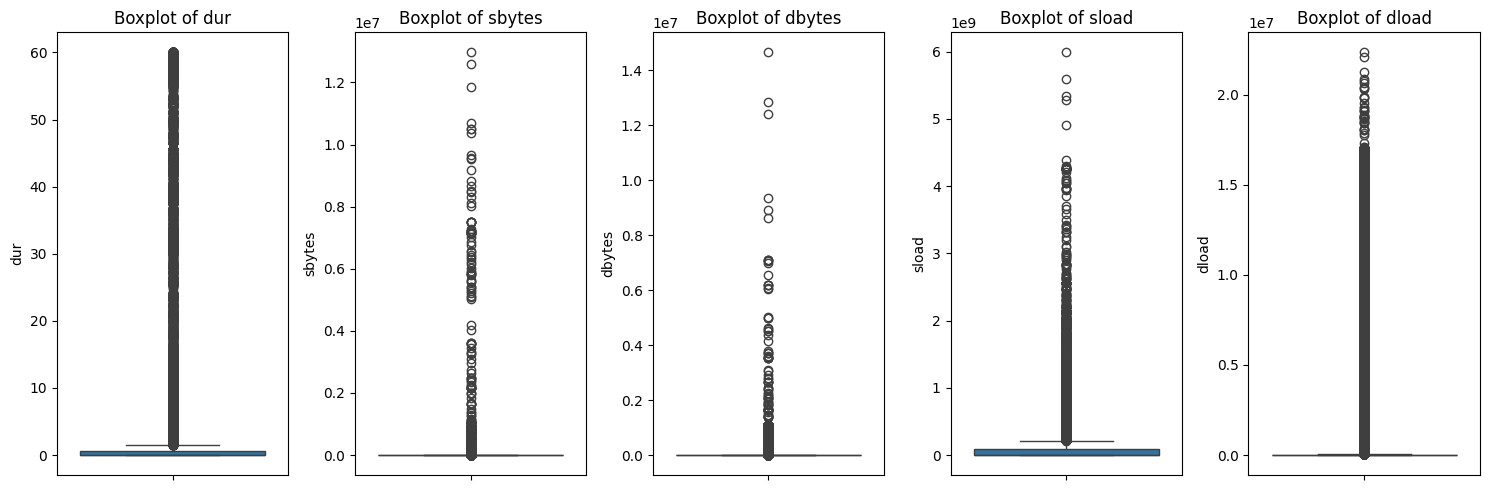


Handling outliers using clip method...

Cleaned Data Statistics:
                 dur         sbytes         dbytes           sttl  \
count  140272.000000  140272.000000  140272.000000  140272.000000   
mean        0.346719     906.780355     573.666170     183.288960   
std         0.535396    1026.533553     807.414274     101.632484   
min         0.000000      28.000000       0.000000       0.000000   
25%         0.000008     114.000000       0.000000      62.000000   
50%         0.001331     450.000000     162.000000     254.000000   
75%         0.625537    1268.000000     836.000000     254.000000   
max         1.563830    2999.000000    2090.000000     255.000000   

                dttl          sloss          dloss         sload  \
count  140272.000000  140272.000000  140272.000000  1.402720e+05   
mean       77.014180       1.465446       1.324676  4.743018e+07   
std       108.254353       1.928720       1.920667  6.793553e+07   
min         0.000000       0.000000     

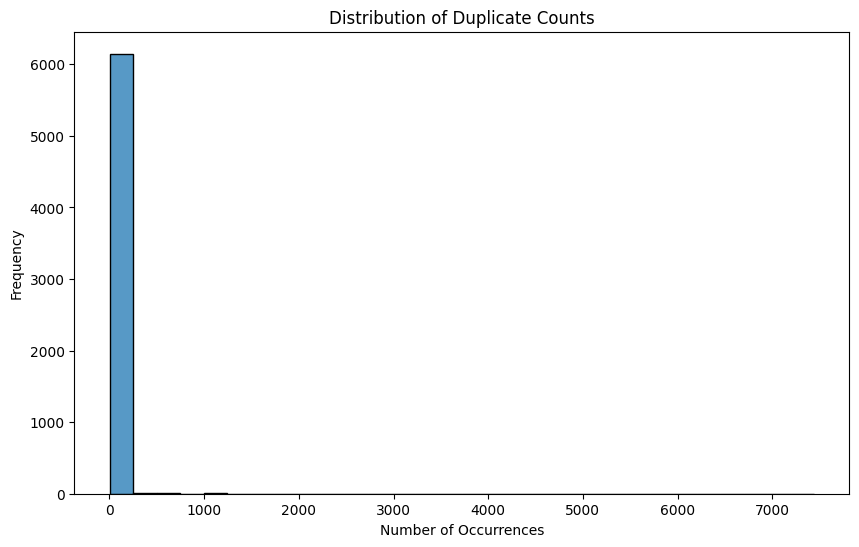


Duplicate Removal Summary:
--------------------------------------------------
Original number of rows: 140272
Rows after removing duplicates: 62327
Number of rows removed: 77945
Percentage of rows removed: 55.57%

Feature Selection Summary:
Original features: 39
Selected features: 28
Features dropped due to low variance: 8
Low variance features: ['is_sm_ips_ports', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'trans_depth', 'response_body_len', 'tcprtt', 'synack', 'ackdat']
Features dropped due to high correlation: 3
Highly correlated features: ['dloss', 'dpkts', 'sinpkt']
Total features dropped: 11
Verification: 39 original - 11 dropped = 28 selected

Creating interaction features...

Creating domain-specific features...

Performing numerical feature binning...

Applying feature selection...

Cleaning is_sm_ips_ports:
Original value distribution:
is_sm_ips_ports
0.0    32817
NaN     1718
1.0      534
Name: count, dtype: int64

New value distribution:
is_sm_ips_ports
0.0    32817
NaN     1718
1.

In [329]:
binary_cleaner_and_imputer = Pipeline([
      ('binary_cleaner', binary_cleaner),
    ('imputer', NetworkTrafficImputer()),
])


cleaner_pipeline = Pipeline([
    ('binary_cleaner_and_imputer', binary_cleaner_and_imputer),
    ('outlier_handler', outlier_handler),
    ('duplicate_handler', duplicate_handler),
    ('feature_engineer', feature_engineer),
])

cleaned_train_set = cleaner_pipeline.fit_transform(train_set)
cleaned_val_set = cleaner_pipeline.transform(val_set)

imputed_test_set = binary_cleaner_and_imputer.transform(test_df)
feature_engineered_test_set = feature_engineer.transform(imputed_test_set)




In [330]:

y_train_set_cleaned = cleaned_train_set['attack_cat']
x_train_set_cleaned = cleaned_train_set.drop(columns=['attack_cat'], axis=1 )

numeric_features = x_train_set_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train_set_cleaned.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', FeatureScaler(), numeric_features),
        ('cat', FeatureEncoder(), categorical_features)
    ]
)

# Create pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # ('pca', PCAReducer(n_components=10))

])

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_set_cleaned)
y_val_encoded = label_encoder.transform(cleaned_val_set['attack_cat'])

# Process data through pipeline
x_train_preprocessed = pipe.fit_transform(x_train_set_cleaned, y_train_encoded)
x_val_preprocessed = pipe.transform(cleaned_val_set)

x_test_preprocessed = pipe.transform(feature_engineered_test_set)





In [331]:
undersampler = RandomUnderSampler(random_state=42)  
x_train_balanced, y_train_balanced = undersampler.fit_resample(x_train_preprocessed, y_train_encoded)

In [332]:
print(y_train_set_cleaned)

0                Normal
1              Exploits
2               Generic
3               Generic
4              Analysis
              ...      
62322          Exploits
62323          Exploits
62324               DoS
62325    Reconnaissance
62326            Normal
Name: attack_cat, Length: 62327, dtype: object


or create your own here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [333]:


class Custom_KNeighborsClassifier():
    def __init__(self, n_neighbors=5, metric="euclidean", p=None):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p

        if not isinstance(n_neighbors, int):
            raise TypeError(f"n_neighbors must be an integer, got {type(n_neighbors).__name__} instead.")

        if self.metric == "manhattan" and self.p not in (None, 1):
            raise ValueError("when metric='manhattan', p should be None or 1.")
        if self.metric == "euclidean" and self.p not in (None, 2):
            raise ValueError("when metric='euclidean', p should be None or 2.")
        if metric == "minkowski" and p is None:
            raise ValueError("For metric='minkowski', you must specify a value for p.")

    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)

    def predict(self, X):
        return np.array([self._predict(x) for x in X]).astype('float')

    def _predict(self, x):
        if self.metric == "manhattan":
            dist = np.sum(np.abs(self.X - x), axis=1)
        elif self.metric == "euclidean":
            dist = np.linalg.norm(self.X - x, axis=1)
        elif self.metric == "minkowski":
            dist = np.sum(np.abs(self.X - x) ** self.p, axis=1) ** (1 / self.p)

        nearest_indices = np.argsort(dist)[:self.n_neighbors]
        nearest_labels = self.y[nearest_indices]
        prediction = np.bincount(nearest_labels).argmax()
        
        return prediction


In [334]:
from collections import Counter
from concurrent.futures import ThreadPoolExecutor

class OptimizedKNN:
    """
    Optimized K-Nearest Neighbors classifier with parallel processing capabilities.
    
    Features:
    - Multiple distance metrics (Euclidean, Manhattan, Minkowski)
    - Parallel processing for faster predictions
    - Efficient distance calculations using vectorization
    - Distance caching for repeated predictions
    - Support for weighted voting
    
    Parameters:
    -----------
    n_neighbors : int, default=5
        Number of neighbors to use for prediction
    metric : str, default="euclidean"
        Distance metric to use. Options: "euclidean", "manhattan", "minkowski"
    p : int, optional
        Power parameter for Minkowski metric
    weights : str, default="uniform"
        Weight function used in prediction. Options: "uniform", "distance"
    n_jobs : int, default=1
        Number of parallel jobs. If -1, use all available CPU cores
    """
    
    def __init__(self, n_neighbors=5, metric="euclidean", p=None, 
                 weights="uniform", n_jobs=1):
        # Validate inputs
        if not isinstance(n_neighbors, int) or n_neighbors <= 0:
            raise ValueError(f"n_neighbors must be a positive integer, got {n_neighbors}")
            
        if metric not in ["euclidean", "manhattan", "minkowski"]:
            raise ValueError(f"Unsupported metric: {metric}")
            
        if weights not in ["uniform", "distance"]:
            raise ValueError(f"Unsupported weight function: {weights}")
            
        if metric == "manhattan" and p not in (None, 1):
            raise ValueError("When metric='manhattan', p should be None or 1")
            
        if metric == "euclidean" and p not in (None, 2):
            raise ValueError("When metric='euclidean', p should be None or 2")
            
        if metric == "minkowski" and p is None:
            raise ValueError("For metric='minkowski', p parameter is required")
        
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.p = p
        self.weights = weights
        self.n_jobs = n_jobs if n_jobs != -1 else None  # None means use all cores
        
        # Initialize storage
        self.X = None
        self.y = None
        self._distance_cache = {}
        
    def _validate_data(self, X, y=None):
        """Validate and convert input data to numpy arrays."""
        X = np.asarray(X)
        if y is not None:
            y = np.asarray(y)
            if len(X) != len(y):
                raise ValueError("X and y must have the same number of samples")
        return X, y
    
    def fit(self, X, y):
        """
        Fit the KNN model.
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data
        y : array-like of shape (n_samples,)
            Target values
        
        Returns:
        --------
        self : OptimizedKNN
            The fitted model
        """
        self.X, self.y = self._validate_data(X, y)
        self._classes = np.unique(y)
        self._distance_cache.clear()  # Clear cache on new fit
        return self
    
    def _compute_distances(self, x):
        """Compute distances between a single point and all training points."""
        if self.metric == "manhattan":
            return np.sum(np.abs(self.X - x), axis=1)
        elif self.metric == "euclidean":
            # Use optimized norm calculation
            return np.sqrt(np.sum((self.X - x) ** 2, axis=1))
        else:  # minkowski
            return np.power(np.sum(np.power(np.abs(self.X - x), self.p), axis=1), 1/self.p)
    
    def _predict_single(self, x):
        """Predict class for a single sample."""
        # Check cache first
        x_key = hash(x.tobytes())
        if x_key in self._distance_cache:
            distances = self._distance_cache[x_key]
        else:
            distances = self._compute_distances(x)
            self._distance_cache[x_key] = distances
        
        # Get nearest neighbors
        nearest_indices = np.argpartition(distances, self.n_neighbors)[:self.n_neighbors]
        nearest_distances = distances[nearest_indices]
        nearest_labels = self.y[nearest_indices]
        
        if self.weights == "uniform":
            # Simple majority voting
            return Counter(nearest_labels).most_common(1)[0][0]
        else:  # distance weighting
            # Avoid division by zero
            weights = 1 / (nearest_distances + np.finfo(float).eps)
            weighted_votes = {}
            for label, weight in zip(nearest_labels, weights):
                weighted_votes[label] = weighted_votes.get(label, 0) + weight
            return max(weighted_votes.items(), key=lambda x: x[1])[0]
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Samples to predict
        
        Returns:
        --------
        y_pred : array of shape (n_samples,)
            Predicted class labels
        """
        X, _ = self._validate_data(X)
        
        if self.n_jobs == 1:
            return np.array([self._predict_single(x) for x in X])
        
        # Parallel prediction
        with ThreadPoolExecutor(max_workers=self.n_jobs) as executor:
            predictions = list(executor.map(self._predict_single, X))
        return np.array(predictions)
    
    def get_params(self):
        """Get model parameters."""
        return {
            'n_neighbors': self.n_neighbors,
            'metric': self.metric,
            'p': self.p,
            'weights': self.weights,
            'n_jobs': self.n_jobs
        }

In [335]:
print(f"x_val_preprocessed type: {type(x_val_preprocessed)}")
print(f"x_val_preprocessed shape: {x_val_preprocessed.shape}")

print(x_val_preprocessed)

x_val_preprocessed type: <class 'numpy.ndarray'>
x_val_preprocessed shape: (17798, 28)
[[-0.48842516 -0.45167854 -0.38090011 ... -0.36815309 -0.43353351
  -0.41091289]
 [-0.48841839 -0.45167854 -0.38090011 ... -0.36815309 -0.43353351
  -0.41091289]
 [-0.48841726 -0.40793489 -0.38090011 ... -0.36815309 -0.43353351
  -0.41084463]
 ...
 [ 0.2833718  -0.10783316  0.766191   ...  0.67514965  0.12780237
   0.34772288]
 [-0.48724295 -0.44354018 -0.29198683 ... -0.36815309 -0.43353351
  -0.41086739]
 [-0.35718722 -0.28077314  0.766191   ... -0.34681596  0.06688648
  -0.39126393]]


In [336]:
# custom_knn = Custom_KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
# custom_knn.fit(x_train_preprocessed, y_train_encoded)
# y_pred_custom = custom_knn.predict(x_val_preprocessed)

# knn = OptimizedKNN(
#     n_neighbors=5,
#     metric="euclidean",
#     weights="distance",
#     n_jobs=-1  # Use all CPU cores
# )
# knn.fit(x_train_preprocessed, y_train_encoded)
# y_pred_custom = knn.predict(x_val_preprocessed)

# print(accuracy_score(y_val_encoded, y_pred_custom))

# print(classification_report(y_val_encoded, y_pred_custom))  

In [337]:
sklearn_knn = KNeighborsClassifier(n_neighbors=5)
# x_train_balanced, y_train_balanced
sklearn_knn.fit(x_train_preprocessed, y_train_encoded)

y_pred_sklearn = sklearn_knn.predict(x_val_preprocessed)

print(accuracy_score(y_val_encoded, y_pred_sklearn))

print(classification_report(y_val_encoded, y_pred_sklearn))

0.7487919991010226
              precision    recall  f1-score   support

           0       0.35      0.27      0.31       144
           1       0.12      0.08      0.10       111
           2       0.27      0.24      0.26       802
           3       0.71      0.78      0.74      4047
           4       0.58      0.64      0.61      2644
           5       0.90      0.52      0.66       238
           6       0.90      0.88      0.89      8542
           7       0.56      0.62      0.59      1014
           8       0.34      0.15      0.21       229
           9       0.00      0.00      0.00        27

    accuracy                           0.75     17798
   macro avg       0.47      0.42      0.44     17798
weighted avg       0.75      0.75      0.75     17798



## B. Naive Bayes

In [338]:
# Type your code here

## C. ID3

In [339]:
import numpy as np
from scipy.stats import mode

# class Node():
#     """
#     Ref:
#     https://www.youtube.com/watch?v=mN7i0U4YMqY
#     https://www.youtube.com/watch?v=TDkZev5xjfg
#     """
#     def __init__(self, X, y, depth, max_features):
#         self.depth = depth
#         self.X = X
#         self.y = y
#         self.max_features = max_features
#         self.best_feature_index = None
#         self.best_threshold = None
#         self.left = None
#         self.right = None
#         classes, class_counts = np.unique(self.y, return_counts=True)
#         self.label = classes[np.argmax(class_counts)]

#     def make_split(self, max_depth, min_samples_split):
#         self.best_feature_index, self.best_threshold = self._find_best_split()
#         if self.best_feature_index is not None:
#             if self.depth < max_depth and self.X.shape[0] > min_samples_split and not(np.all(self.y == self.y[0])):
#                 left_mask = self.X[:, self.best_feature_index] < self.best_threshold
#                 right_mask = ~left_mask

#                 if np.sum(left_mask) > 0 and np.sum(right_mask) > 0:
#                     self.left = Node(self.X[left_mask], self.y[left_mask], depth=self.depth+1, max_features=self.max_features)
#                     self.right = Node(self.X[right_mask], self.y[right_mask], depth=self.depth+1, max_features=self.max_features)

#                     self.left.make_split(max_depth, min_samples_split)
#                     self.right.make_split(max_depth, min_samples_split)

#     def _calculate_information_gain(self, feature_index, threshold):
#         left_mask = self.X[:, feature_index] < threshold
#         right_mask = ~left_mask

#         left_entropy = self._calculate_entropy(self.y[left_mask])
#         right_entropy = self._calculate_entropy(self.y[right_mask])

#         n_left = np.sum(left_mask)
#         n_right = self.y.shape[0] - n_left

#         weighted_entropy = (n_left / len(self.y)) * left_entropy + (n_right / len(self.y)) * right_entropy
#         return self._calculate_entropy(self.y) - weighted_entropy

#     def _calculate_entropy(self, y):
#         _, class_counts = np.unique(y, return_counts=True)
#         probabilities = class_counts / len(y)
#         return -np.sum(probabilities * np.log2(probabilities))
    
#     def _find_best_split(self):
#         largest_info_gain = 0
#         best_feature_index = None
#         best_threshold = None

#         selected_features = np.random.choice(self.X.shape[1], self.max_features, replace=False)
#         for feature_index in selected_features:
#             sorted_values = np.sort(np.unique(self.X[:, feature_index]))
#             thresholds = (sorted_values[:-1] + sorted_values[1:]) / 2

#             for threshold in thresholds:
#                 info_gain = self._calculate_information_gain(feature_index, threshold)
#                 if info_gain > largest_info_gain:
#                     best_feature_index = feature_index
#                     best_threshold = threshold
#                     largest_info_gain = info_gain

#         return best_feature_index, best_threshold

# class DecisionTreeClassifier():
#     def __init__(self, max_depth=None, min_samples_split=2, max_features=None):
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.max_features = max_features
#         self.classes_ = None
#         self.n_classes_ = None
#         self.root = None

#     def fit(self, X, y):
#         self.classes_ = np.unique(y)
#         self.n_classes_ = self.classes_.shape[0]
#         if self.max_features is None:
#             self.max_features = X.shape[1]
#         self.root = Node(X, y, depth=0, max_features=self.max_features)
#         self.root.make_split(self.max_depth, self.min_samples_split)
        
#     def _predict_single(self, x):
#         node = self.root
#         while node.left and node.right:
#             if node.best_feature_index is None:
#                 break

#             if x[node.best_feature_index] < node.best_threshold:
#                 node = node.left
#             else:
#                 node = node.right
#         return node.label

#     def predict(self, X):
#         return np.array([self._predict_single(x) for x in X])
    
# class RandomForestClassifier():
#     def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2):
#         self.n_estimaors = n_estimators
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.max_features = None
#         self.trees = []

#     def fit(self, X, y):
#         self.max_features = np.floor(np.sqrt(X.shape[1]))
#         n_samples = X.shape[0]

#         for _ in range(self.n_estimators):
#             indices = np.random.choice(n_samples, n_samples, replace=True)
#             X_sample, y_sample = X[indices], y[indices]

#             tree = DecisionTreeClassifier(
#                 max_depth=self.max_depth,
#                 min_samples_split=self.min_samples_split,
#                 max_features=self.max_features
#             )
#             tree.fit(X_sample, y_sample)
#             self.trees.append(tree)
        
#     def predict(self, X):
#         tree_preds = np.array([tree.predict(X) for tree in self.trees])
#         return np.array([mode(preds).mode[0] for preds in tree_preds.T])


In [340]:
x_new_train, y_new_train = x_train_preprocessed[:1000], y_train_encoded[:1000]

In [341]:
# # import numpy as np
# # from scipy.stats import mode
# # from concurrent.futures import ThreadPoolExecutor
# from threading import Lock
# import multiprocessing
# import warnings
# warnings.filterwarnings('ignore')

# class Node:
#     def __init__(self, X, y, depth=0):
#         self.depth = depth
#         self.X = X
#         self.y = y
#         self.feature_index = None
#         self.threshold = None
#         self.is_continuous = False
#         self.children = {}
#         self.left = None  # For continuous features
#         self.right = None  # For continuous features
#         self.pruned = False
#         classes, counts = np.unique(y, return_counts=True)
#         self.prediction = classes[np.argmax(counts)]
#         self.samples = len(y)
#         self.score = np.max(counts) / self.samples
        
# class OptimizedID3:
#     def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1,
#                  max_features=None, n_threads=None):
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.min_samples_leaf = min_samples_leaf
#         self.max_features = max_features
#         self.n_threads = n_threads if n_threads is not None else max(1, multiprocessing.cpu_count() - 1)
#         self.feature_types = None  # Will store continuous/categorical info
#         self.root = None
#         self._split_lock = Lock()
        
#     def _entropy(self, y):
#         """Calculate entropy of a node."""
#         _, counts = np.unique(y, return_counts=True)
#         probabilities = counts / len(y)
#         return -np.sum(probabilities * np.log2(probabilities + 1e-10))
    
#     def _split_information(self, y_subsets):
#         """Calculate split information for gain ratio."""
#         total_samples = sum(len(subset) for subset in y_subsets)
#         probabilities = [len(subset)/total_samples for subset in y_subsets]
#         return -np.sum(p * np.log2(p + 1e-10) for p in probabilities)
    
#     def _gain_ratio(self, y, y_subsets):
#         """Calculate gain ratio for a split."""
#         initial_entropy = self._entropy(y)
#         weighted_entropy = sum(len(subset)/len(y) * self._entropy(subset) 
#                              for subset in y_subsets)
#         information_gain = initial_entropy - weighted_entropy
#         split_info = self._split_information(y_subsets)
#         return information_gain / (split_info + 1e-10)
    
#     def _find_best_continuous_split(self, X, y, feature_idx):
#         """Find best split point for continuous feature using gain ratio."""
#         sorted_idx = np.argsort(X[:, feature_idx])
#         sorted_x = X[sorted_idx, feature_idx]
#         sorted_y = y[sorted_idx]
        
#         # Get unique values and their midpoints
#         unique_values = np.unique(sorted_x)
#         if len(unique_values) == 1:
#             return None, -np.inf
            
#         thresholds = (unique_values[:-1] + unique_values[1:]) / 2
#         best_gain = -np.inf
#         best_threshold = None
        
#         for threshold in thresholds:
#             left_mask = sorted_x <= threshold
#             right_mask = ~left_mask
            
#             if np.sum(left_mask) < self.min_samples_leaf or \
#                np.sum(right_mask) < self.min_samples_leaf:
#                 continue
                
#             y_left = sorted_y[left_mask]
#             y_right = sorted_y[right_mask]
            
#             gain = self._gain_ratio(sorted_y, [y_left, y_right])
            
#             if gain > best_gain:
#                 best_gain = gain
#                 best_threshold = threshold
                
#         return best_threshold, best_gain
    
#     def _find_best_categorical_split(self, X, y, feature_idx):
#         """Find best split for categorical feature using gain ratio."""
#         unique_values = np.unique(X[:, feature_idx])
#         y_subsets = [y[X[:, feature_idx] == val] for val in unique_values]
#         gain = self._gain_ratio(y, y_subsets)
#         return unique_values, gain
    
#     def _find_best_split(self, node):
#         """Find the best feature and split point."""
#         best_gain = -np.inf
#         best_feature = None
#         best_threshold = None
#         is_continuous = False
        
#         features_to_try = np.random.choice(
#             self.X.shape[1],
#             size=self.max_features,
#             replace=False
#         ) if self.max_features else range(self.X.shape[1])
        
#         for feature_idx in features_to_try:
#             if self.feature_types[feature_idx] == 'continuous':
#                 threshold, gain = self._find_best_continuous_split(
#                     node.X, node.y, feature_idx)
#                 if gain > best_gain:
#                     best_gain = gain
#                     best_feature = feature_idx
#                     best_threshold = threshold
#                     is_continuous = True
#             else:
#                 values, gain = self._find_best_categorical_split(
#                     node.X, node.y, feature_idx)
#                 if gain > best_gain:
#                     best_gain = gain
#                     best_feature = feature_idx
#                     best_threshold = values
#                     is_continuous = False
                    
#         return best_feature, best_threshold, is_continuous
    
#     def _split_node(self, node):
#         """Split a node based on the best feature."""
#         if len(np.unique(node.y)) == 1 or \
#            node.depth == self.max_depth or \
#            len(node.y) < self.min_samples_split:
#             return
            
#         best_feature, best_threshold, is_continuous = self._find_best_split(node)
        
#         if best_feature is None:
#             return
            
#         node.feature_index = best_feature
#         node.threshold = best_threshold
#         node.is_continuous = is_continuous
        
#         if is_continuous:
#             left_mask = node.X[:, best_feature] <= best_threshold
#             right_mask = ~left_mask
            
#             if np.sum(left_mask) >= self.min_samples_leaf and \
#                np.sum(right_mask) >= self.min_samples_leaf:
#                 node.left = Node(
#                     node.X[left_mask], 
#                     node.y[left_mask], 
#                     depth=node.depth + 1
#                 )
#                 node.right = Node(
#                     node.X[right_mask], 
#                     node.y[right_mask], 
#                     depth=node.depth + 1
#                 )
                
#                 with ThreadPoolExecutor(max_workers=self.n_threads) as executor:
#                     executor.submit(self._split_node, node.left)
#                     executor.submit(self._split_node, node.right)
#         else:
#             for value in node.threshold:
#                 mask = node.X[:, best_feature] == value
#                 if np.sum(mask) >= self.min_samples_leaf:
#                     child = Node(
#                         node.X[mask], 
#                         node.y[mask], 
#                         depth=node.depth + 1
#                     )
#                     node.children[value] = child
#                     self._split_node(child)
    
#     def _prune_node(self, node, X_val, y_val):
#         """Post-prune the tree using validation data."""
#         if node is None or (node.left is None and node.right is None and not node.children):
#             return
            
#         # Recursively prune children
#         if node.is_continuous:
#             if node.left:
#                 left_mask = X_val[:, node.feature_index] <= node.threshold
#                 self._prune_node(node.left, X_val[left_mask], y_val[left_mask])
#             if node.right:
#                 right_mask = X_val[:, node.feature_index] > node.threshold
#                 self._prune_node(node.right, X_val[right_mask], y_val[right_mask])
#         else:
#             for value, child in node.children.items():
#                 mask = X_val[:, node.feature_index] == value
#                 self._prune_node(child, X_val[mask], y_val[mask])
        
#         # Calculate error before pruning
#         y_pred = np.array([self._predict_single(x, node) for x in X_val])
#         error_before = np.sum(y_pred != y_val)
        
#         # Temporarily prune node
#         temp_children = node.children
#         temp_left = node.left
#         temp_right = node.right
#         node.children = {}
#         node.left = None
#         node.right = None
        
#         # Calculate error after pruning
#         y_pred = np.array([self._predict_single(x, node) for x in X_val])
#         error_after = np.sum(y_pred != y_val)
        
#         # Keep pruned if error doesn't increase
#         if error_after <= error_before:
#             node.pruned = True
#         else:
#             node.children = temp_children
#             node.left = temp_left
#             node.right = temp_right
    
#     def fit(self, X, y, X_val=None, y_val=None):
#         """Fit the decision tree to the training data."""
#         self.X = X
#         self.n_classes_ = len(np.unique(y))
        
#         # Determine feature types
#         self.feature_types = ['continuous' if len(np.unique(X[:, i])) > 10
#                             else 'categorical' for i in range(X.shape[1])]
        
#         # Set max features if not specified
#         if self.max_features is None:
#             self.max_features = int(np.sqrt(X.shape[1]))
        
#         # Create and split root node
#         self.root = Node(X, y)
#         self._split_node(self.root)
        
#         # Post-pruning if validation data is provided
#         if X_val is not None and y_val is not None:
#             self._prune_node(self.root, X_val, y_val)
            
#         return self
    
#     def _predict_single(self, x, node=None):
#         """Predict class for a single sample."""
#         if node is None:
#             node = self.root
            
#         if node.pruned or (node.left is None and node.right is None and not node.children):
#             return node.prediction
            
#         if node.is_continuous:
#             if x[node.feature_index] <= node.threshold:
#                 return self._predict_single(x, node.left)
#             return self._predict_single(x, node.right)
#         else:
#             value = x[node.feature_index]
#             if value in node.children:
#                 return self._predict_single(x, node.children[value])
#             return node.prediction
    
#     def predict(self, X):
#         """Predict classes for multiple samples."""
#         return np.array([self._predict_single(x) for x in X])

In [342]:
# 0.41

# import numpy as np
# from collections import Counter
# import pandas as pd

# class Node:
#     def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
#         self.feature = feature  # Feature index/name to split on
#         self.threshold = threshold  # Threshold for numerical features
#         self.left = left  # Left subtree
#         self.right = right  # Right subtree
#         self.value = value  # Predicted class for leaf nodes

# class ID3DecisionTree:
#     def __init__(self, max_depth=None, min_samples_split=2):
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.root = None
#         self.n_classes = None
#         self.feature_types = None
#         self.feature_names = None

#     def fit(self, X, y, feature_types=None, feature_names=None):
#         """
#         Train the decision tree
        
#         Parameters:
#         -----------
#         X : array-like of shape (n_samples, n_features)
#             Training data
#         y : array-like of shape (n_samples,)
#             Target values
#         feature_types : list of str, optional
#             List of feature types ('numerical' or 'categorical')
#         feature_names : list of str, optional
#             List of feature names
#         """
#         X = np.array(X)
#         y = np.array(y)
        
#         # Store number of unique classes
#         self.n_classes = len(np.unique(y))
        
#         # Infer or store feature types
#         if feature_types is None:
#             self.feature_types = ['numerical'] * X.shape[1]
#         else:
#             self.feature_types = feature_types
            
#         # Store feature names
#         if feature_names is None:
#             self.feature_names = [f'feature_{i}' for i in range(X.shape[1])]
#         else:
#             self.feature_names = feature_names
        
#         # Build tree
#         self.root = self._grow_tree(X, y)
        
#         return self

#     def _entropy(self, y):
#         """Calculate entropy of a node"""
#         hist = np.bincount(y)
#         ps = hist / len(y)
#         ps = ps[ps > 0]  # Remove zero probabilities
#         return -np.sum(ps * np.log2(ps))

#     def _information_gain(self, y, y_left, y_right):
#         """Calculate information gain for a split"""
#         parent_entropy = self._entropy(y)
#         n = len(y)
#         n_l, n_r = len(y_left), len(y_right)
        
#         if n_l == 0 or n_r == 0:  # Avoid splits that don't actually split the data
#             return 0
        
#         child_entropy = (n_l / n) * self._entropy(y_left) + (n_r / n) * self._entropy(y_right)
#         return parent_entropy - child_entropy

#     def _best_split(self, X, y, feature_idx):
#         """Find the best split for a node"""
#         best_gain = -1
#         best_threshold = None
        
#         if self.feature_types[feature_idx] == 'numerical':
#             # Sort unique values
#             thresholds = np.unique(X[:, feature_idx])
            
#             # Try all possible thresholds
#             for threshold in thresholds:
#                 left_mask = X[:, feature_idx] <= threshold
#                 right_mask = ~left_mask
                
#                 if np.sum(left_mask) > 0 and np.sum(right_mask) > 0:  # Ensure split is valid
#                     gain = self._information_gain(y, y[left_mask], y[right_mask])
                    
#                     if gain > best_gain:
#                         best_gain = gain
#                         best_threshold = threshold
                        
#         else:  # categorical
#             # Each unique value becomes a threshold
#             unique_values = np.unique(X[:, feature_idx])
#             for value in unique_values:
#                 left_mask = X[:, feature_idx] == value
#                 right_mask = ~left_mask
                
#                 if np.sum(left_mask) > 0 and np.sum(right_mask) > 0:
#                     gain = self._information_gain(y, y[left_mask], y[right_mask])
                    
#                     if gain > best_gain:
#                         best_gain = gain
#                         best_threshold = value
        
#         return best_gain, best_threshold

#     def _grow_tree(self, X, y, depth=0):
#         """Recursively grow the decision tree"""
#         n_samples, n_features = X.shape
        
#         # Check stopping criteria
#         if (self.max_depth is not None and depth >= self.max_depth) or \
#            n_samples < self.min_samples_split or \
#            len(np.unique(y)) == 1:
#             # Create leaf node
#             leaf_value = Counter(y).most_common(1)[0][0]
#             return Node(value=leaf_value)
        
#         # Find best split
#         best_gain = -1
#         best_feature = None
#         best_threshold = None
        
#         for feature_idx in range(n_features):
#             gain, threshold = self._best_split(X, y, feature_idx)
#             if gain > best_gain:
#                 best_gain = gain
#                 best_feature = feature_idx
#                 best_threshold = threshold
        
#         # If no good split is found, create leaf node
#         if best_gain == -1:
#             leaf_value = Counter(y).most_common(1)[0][0]
#             return Node(value=leaf_value)
        
#         # Create split node
#         if self.feature_types[best_feature] == 'numerical':
#             left_mask = X[:, best_feature] <= best_threshold
#         else:
#             left_mask = X[:, best_feature] == best_threshold
            
#         right_mask = ~left_mask
        
#         # Recursively grow left and right subtrees
#         left_subtree = self._grow_tree(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self._grow_tree(X[right_mask], y[right_mask], depth + 1)
        
#         return Node(
#             feature=best_feature,
#             threshold=best_threshold,
#             left=left_subtree,
#             right=right_subtree
#         )

#     def predict(self, X):
#         """Predict class for X"""
#         X = np.array(X)
#         return np.array([self._traverse_tree(x, self.root) for x in X])

#     def _traverse_tree(self, x, node):
#         """Helper method to traverse the tree"""
#         if node.value is not None:
#             return node.value

#         if self.feature_types[node.feature] == 'numerical':
#             if x[node.feature] <= node.threshold:
#                 return self._traverse_tree(x, node.left)
#             return self._traverse_tree(x, node.right)
#         else:
#             if x[node.feature] == node.threshold:
#                 return self._traverse_tree(x, node.left)
#             return self._traverse_tree(x, node.right)

In [343]:
import numpy as np
from collections import Counter
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from typing import List, Optional, Union, Tuple
import threading

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature  # Feature index/name to split on
        self.threshold = threshold  # Threshold for numerical features
        self.left = left  # Left subtree
        self.right = right  # Right subtree
        self.value = value  # Predicted class for leaf nodes

class ID3DecisionTree:
    def __init__(self, max_depth: Optional[int] = None, 
                 min_samples_split: int = 2,
                 n_jobs: int = -1):
        """
        Initialize OptimizedID3DecisionTree classifier
        
        Parameters:
        -----------
        max_depth : int, optional
            Maximum depth of the tree
        min_samples_split : int
            Minimum samples required to split a node
        n_jobs : int
            Number of parallel jobs. -1 means using all processors
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_jobs = n_jobs if n_jobs > 0 else threading.active_count()
        self.root = None
        self.n_classes = None
        self.feature_types = None
        self.feature_names = None
        self._lock = threading.Lock()

    def fit(self, X: np.ndarray, y: np.ndarray, 
            feature_types: Optional[List[str]] = None,
            feature_names: Optional[List[str]] = None) -> 'OptimizedID3DecisionTree':
        """
        Train the decision tree using parallel processing
        
        Parameters:
        -----------
        X : array-like of shape (n_samples, n_features)
            Training data
        y : array-like of shape (n_samples,)
            Target values
        feature_types : list of str, optional
            List of feature types ('numerical' or 'categorical')
        feature_names : list of str, optional
            List of feature names
        """
        X = np.array(X)
        y = np.array(y)
        
        self.n_classes = len(np.unique(y))
        self.feature_types = feature_types or ['numerical'] * X.shape[1]
        self.feature_names = feature_names or [f'feature_{i}' for i in range(X.shape[1])]
        
        self.root = self._grow_tree(X, y)
        return self

    def _entropy(self, y: np.ndarray) -> float:
        """Calculate entropy of a node using vectorized operations"""
        hist = np.bincount(y)
        ps = hist / len(y)
        ps = ps[ps > 0]
        return -np.sum(ps * np.log2(ps))

    def _information_gain(self, y: np.ndarray, y_left: np.ndarray, 
                         y_right: np.ndarray) -> float:
        """Calculate information gain for a split using vectorized operations"""
        if len(y_left) == 0 or len(y_right) == 0:
            return 0
            
        n = len(y)
        parent_entropy = self._entropy(y)
        n_l, n_r = len(y_left), len(y_right)
        child_entropy = (n_l / n) * self._entropy(y_left) + (n_r / n) * self._entropy(y_right)
        return parent_entropy - child_entropy

    def _find_best_split_for_feature(self, X: np.ndarray, y: np.ndarray, 
                                   feature_idx: int) -> Tuple[float, Optional[Union[float, str]]]:
        """Find the best split for a single feature"""
        best_gain = -1
        best_threshold = None
        
        if self.feature_types[feature_idx] == 'numerical':
            thresholds = np.unique(X[:, feature_idx])
            
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                if not (np.any(left_mask) and np.any(~left_mask)):
                    continue
                    
                gain = self._information_gain(y, y[left_mask], y[~left_mask])
                if gain > best_gain:
                    best_gain = gain
                    best_threshold = threshold
        else:
            unique_values = np.unique(X[:, feature_idx])
            for value in unique_values:
                left_mask = X[:, feature_idx] == value
                if not (np.any(left_mask) and np.any(~left_mask)):
                    continue
                    
                gain = self._information_gain(y, y[left_mask], y[~left_mask])
                if gain > best_gain:
                    best_gain = gain
                    best_threshold = value
                    
        return best_gain, best_threshold

    def _parallel_find_best_split(self, X: np.ndarray, y: np.ndarray, 
                                feature_indices: List[int]) -> List[Tuple[int, float, Optional[Union[float, str]]]]:
        """Find best splits for multiple features in parallel"""
        results = []
        for idx in feature_indices:
            gain, threshold = self._find_best_split_for_feature(X, y, idx)
            results.append((idx, gain, threshold))
        return results

    def _grow_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> Node:
        """Recursively grow the decision tree using parallel processing for feature selection"""
        n_samples, n_features = X.shape
        
        # Check stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or \
           len(np.unique(y)) == 1:
            return Node(value=Counter(y).most_common(1)[0][0])
        
        # Split features into chunks for parallel processing
        feature_chunks = np.array_split(range(n_features), self.n_jobs)
        
        # Find best split using parallel processing
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        with ThreadPoolExecutor(max_workers=self.n_jobs) as executor:
            future_results = [
                executor.submit(self._parallel_find_best_split, X, y, chunk)
                for chunk in feature_chunks if len(chunk) > 0
            ]
            
            for future in future_results:
                results = future.result()
                for feature_idx, gain, threshold in results:
                    if gain > best_gain:
                        best_gain = gain
                        best_feature = feature_idx
                        best_threshold = threshold
        
        # If no good split is found, create leaf node
        if best_gain == -1:
            return Node(value=Counter(y).most_common(1)[0][0])
        
        # Create split node
        if self.feature_types[best_feature] == 'numerical':
            left_mask = X[:, best_feature] <= best_threshold
        else:
            left_mask = X[:, best_feature] == best_threshold
            
        right_mask = ~left_mask
        
        # Recursively grow subtrees
        left_subtree = self._grow_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._grow_tree(X[right_mask], y[right_mask], depth + 1)
        
        return Node(
            feature=best_feature,
            threshold=best_threshold,
            left=left_subtree,
            right=right_subtree
        )

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict class for X using parallel processing"""
        X = np.array(X)
        
        def predict_batch(batch):
            return np.array([self._traverse_tree(x, self.root) for x in batch])
        
        # Split data into batches for parallel prediction
        batch_size = max(1, len(X) // self.n_jobs)
        batches = [X[i:i + batch_size] for i in range(0, len(X), batch_size)]
        
        with ThreadPoolExecutor(max_workers=self.n_jobs) as executor:
            predictions = list(executor.map(predict_batch, batches))
            
        return np.concatenate(predictions)

    def _traverse_tree(self, x: np.ndarray, node: Node) -> int:
        """Helper method to traverse the tree"""
        if node.value is not None:
            return node.value

        if self.feature_types[node.feature] == 'numerical':
            if x[node.feature] <= node.threshold:
                return self._traverse_tree(x, node.left)
            return self._traverse_tree(x, node.right)
        else:
            if x[node.feature] == node.threshold:
                return self._traverse_tree(x, node.left)
            return self._traverse_tree(x, node.right)

In [344]:
# custom_dtl = DecisionTreeClassifier(max_depth=10, min_samples_split=2, max_features=10)

custom_dtl = ID3DecisionTree(
    max_depth=13,
    min_samples_split=5,
)

custom_dtl.fit(x_train_preprocessed, y_train_encoded)

y_pred_custom_dtl = custom_dtl.predict(x_val_preprocessed)

print(accuracy_score(y_val_encoded, y_pred_custom_dtl))

print(classification_report(y_val_encoded, y_pred_custom_dtl))

0.7949769637037869
              precision    recall  f1-score   support

           0       0.52      0.23      0.32       144
           1       0.50      0.23      0.31       111
           2       0.39      0.26      0.31       802
           3       0.77      0.82      0.80      4047
           4       0.62      0.79      0.70      2644
           5       0.77      0.68      0.72       238
           6       0.93      0.86      0.89      8542
           7       0.75      0.78      0.76      1014
           8       0.55      0.49      0.52       229
           9       0.43      0.44      0.44        27

    accuracy                           0.79     17798
   macro avg       0.62      0.56      0.58     17798
weighted avg       0.80      0.79      0.79     17798



In [351]:
y_test_pred = custom_dtl.predict(x_test_preprocessed)
print(y_test_pred)
print(len(y_test_pred))

[4 4 6 ... 4 3 3]
20583


## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [346]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [353]:
# get the id and attack_cat columns from the test_df
# then print to csv

test_df['attack_cat'] = y_test_pred
test_df['attack_cat'] = label_encoder.inverse_transform(test_df['attack_cat'])
test_df[['id', 'attack_cat']].to_csv('submission.csv', index=False)

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`